<a href="https://colab.research.google.com/github/mxcesarmx/Algorithmic-Trading-Plugins/blob/master/Scrapping_SEO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis Estadístico



[*********************100%%**********************]  1 of 1 completed


Correlation between Volume and High Low Difference: 0.8562273528796378


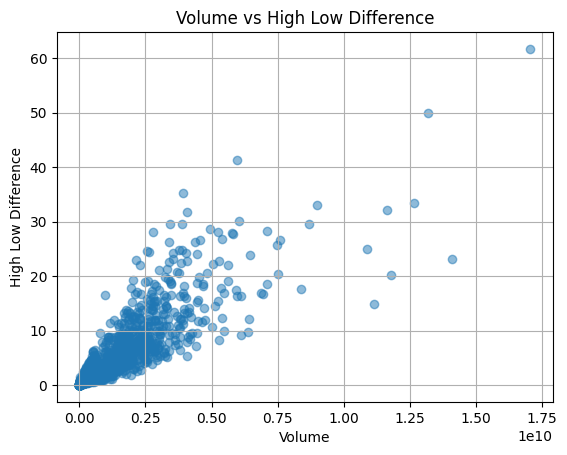

In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

def fetch_data(ticker, start_date, end_date, interval):
    """Fetches historical stock data using yfinance."""
    data = yf.download(ticker, start=start_date, end=end_date, interval=interval)
    return data

def calculate_correlation(data):
    """Calculates correlation between Volume and High Low Difference."""
    volume = data['Volume']
    high_low_diff = data['High'] - data['Low']
    correlation = np.corrcoef(volume, high_low_diff)[0, 1]
    return correlation

def visualize_data(data):
    """Visualizes Volume and High Low Difference."""
    plt.scatter(data['Volume'], data['High'] - data['Low'], alpha=0.5)
    plt.title('Volume vs High Low Difference')
    plt.xlabel('Volume')
    plt.ylabel('High Low Difference')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    ticker = 'SOL-USD'  # Default ticker symbol
    start_date = '2020-01-01'  # Default start date
    end_date = '2024-04-01'  # Default end date
    interval = '1d'  # Default interval

    data = fetch_data(ticker, start_date, end_date, interval)
    correlation = calculate_correlation(data)
    print("Correlation between Volume and High Low Difference:", correlation)

    visualize_data(data)


# Análisis de Volumen

In [ ]:
pip install yfinance

[*********************100%%**********************]  1 of 1 completed


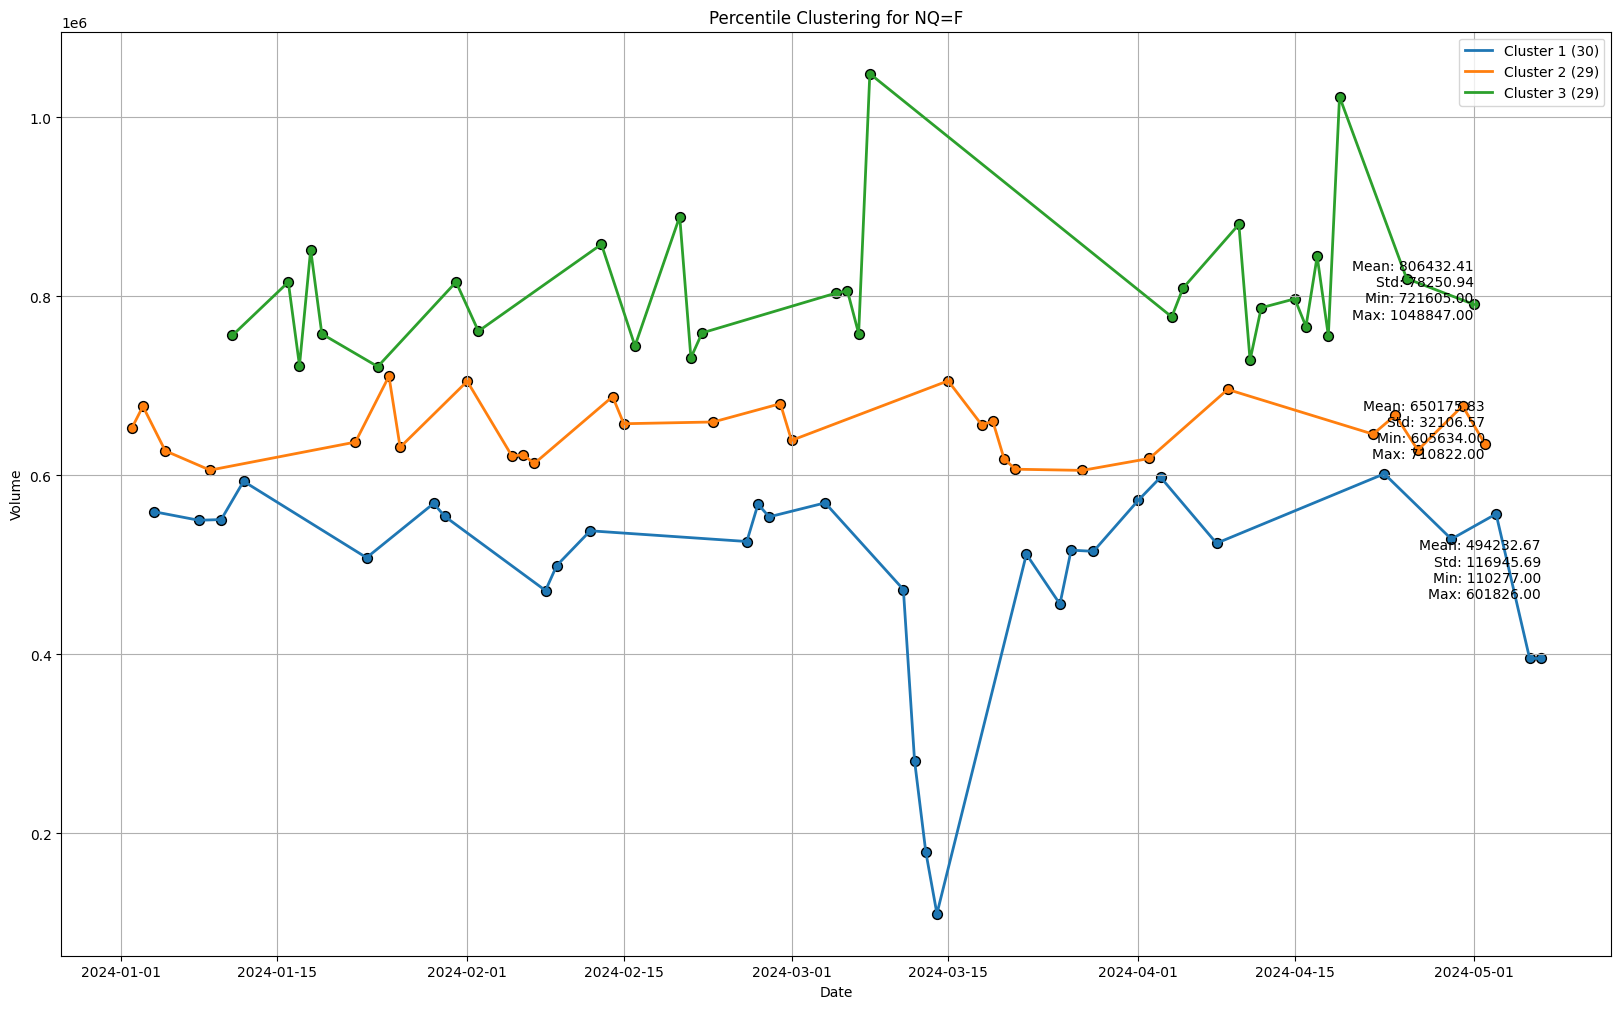

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

def fetch_stock_data(stock_symbol, interval, start_date, end_date):
    data = yf.download(stock_symbol, interval=interval, start=start_date, end=end_date)
    return data

def preprocess_data(data):
    # No need to preprocess data for percentile clustering
    return data

def assign_percentile_cluster(data, n_clusters):
    # Calculate percentiles for Volume
    data['Cluster'] = pd.qcut(data['Volume'], q=n_clusters, labels=False)
    return data['Cluster']

def plot_clustering_results(data, cluster_labels, stock_symbol):
    plt.figure(figsize=(20, 12))
    for i in np.unique(cluster_labels):
        cluster_data = data[data['Cluster'] == i]
        cluster_stats = cluster_data['Volume'].describe()
        plt.plot(cluster_data.index, cluster_data['Volume'], label=f'Cluster {i+1} ({len(cluster_data)})', linewidth=2)
        plt.scatter(cluster_data.index, cluster_data['Volume'], s=50, marker='o', edgecolors='k')
        plt.text(cluster_data.index[-1], cluster_stats['mean'], f"Mean: {cluster_stats['mean']:.2f}\nStd: {cluster_stats['std']:.2f}\nMin: {cluster_stats['min']:.2f}\nMax: {cluster_stats['max']:.2f}", fontsize=10, ha='right', va='center')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.title(f'Percentile Clustering for {stock_symbol}')
    plt.legend()
    plt.grid(True)
    plt.show()

def main():
    stock_symbol = 'NQ=F'
    interval = '1d'
    start_date = '2024-01-01'
    end_date = '2024-05-08'
    n_clusters = 3

    data = fetch_stock_data(stock_symbol, interval, start_date, end_date)
    preprocess_data(data)

    cluster_labels = assign_percentile_cluster(data, n_clusters)

    plot_clustering_results(data, cluster_labels, stock_symbol)

if __name__ == "__main__":
    main()

In [ ]:
pip install pyts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 24.4 MB/s eta 0:00:00


[*********************100%%**********************]  1 of 1 completed


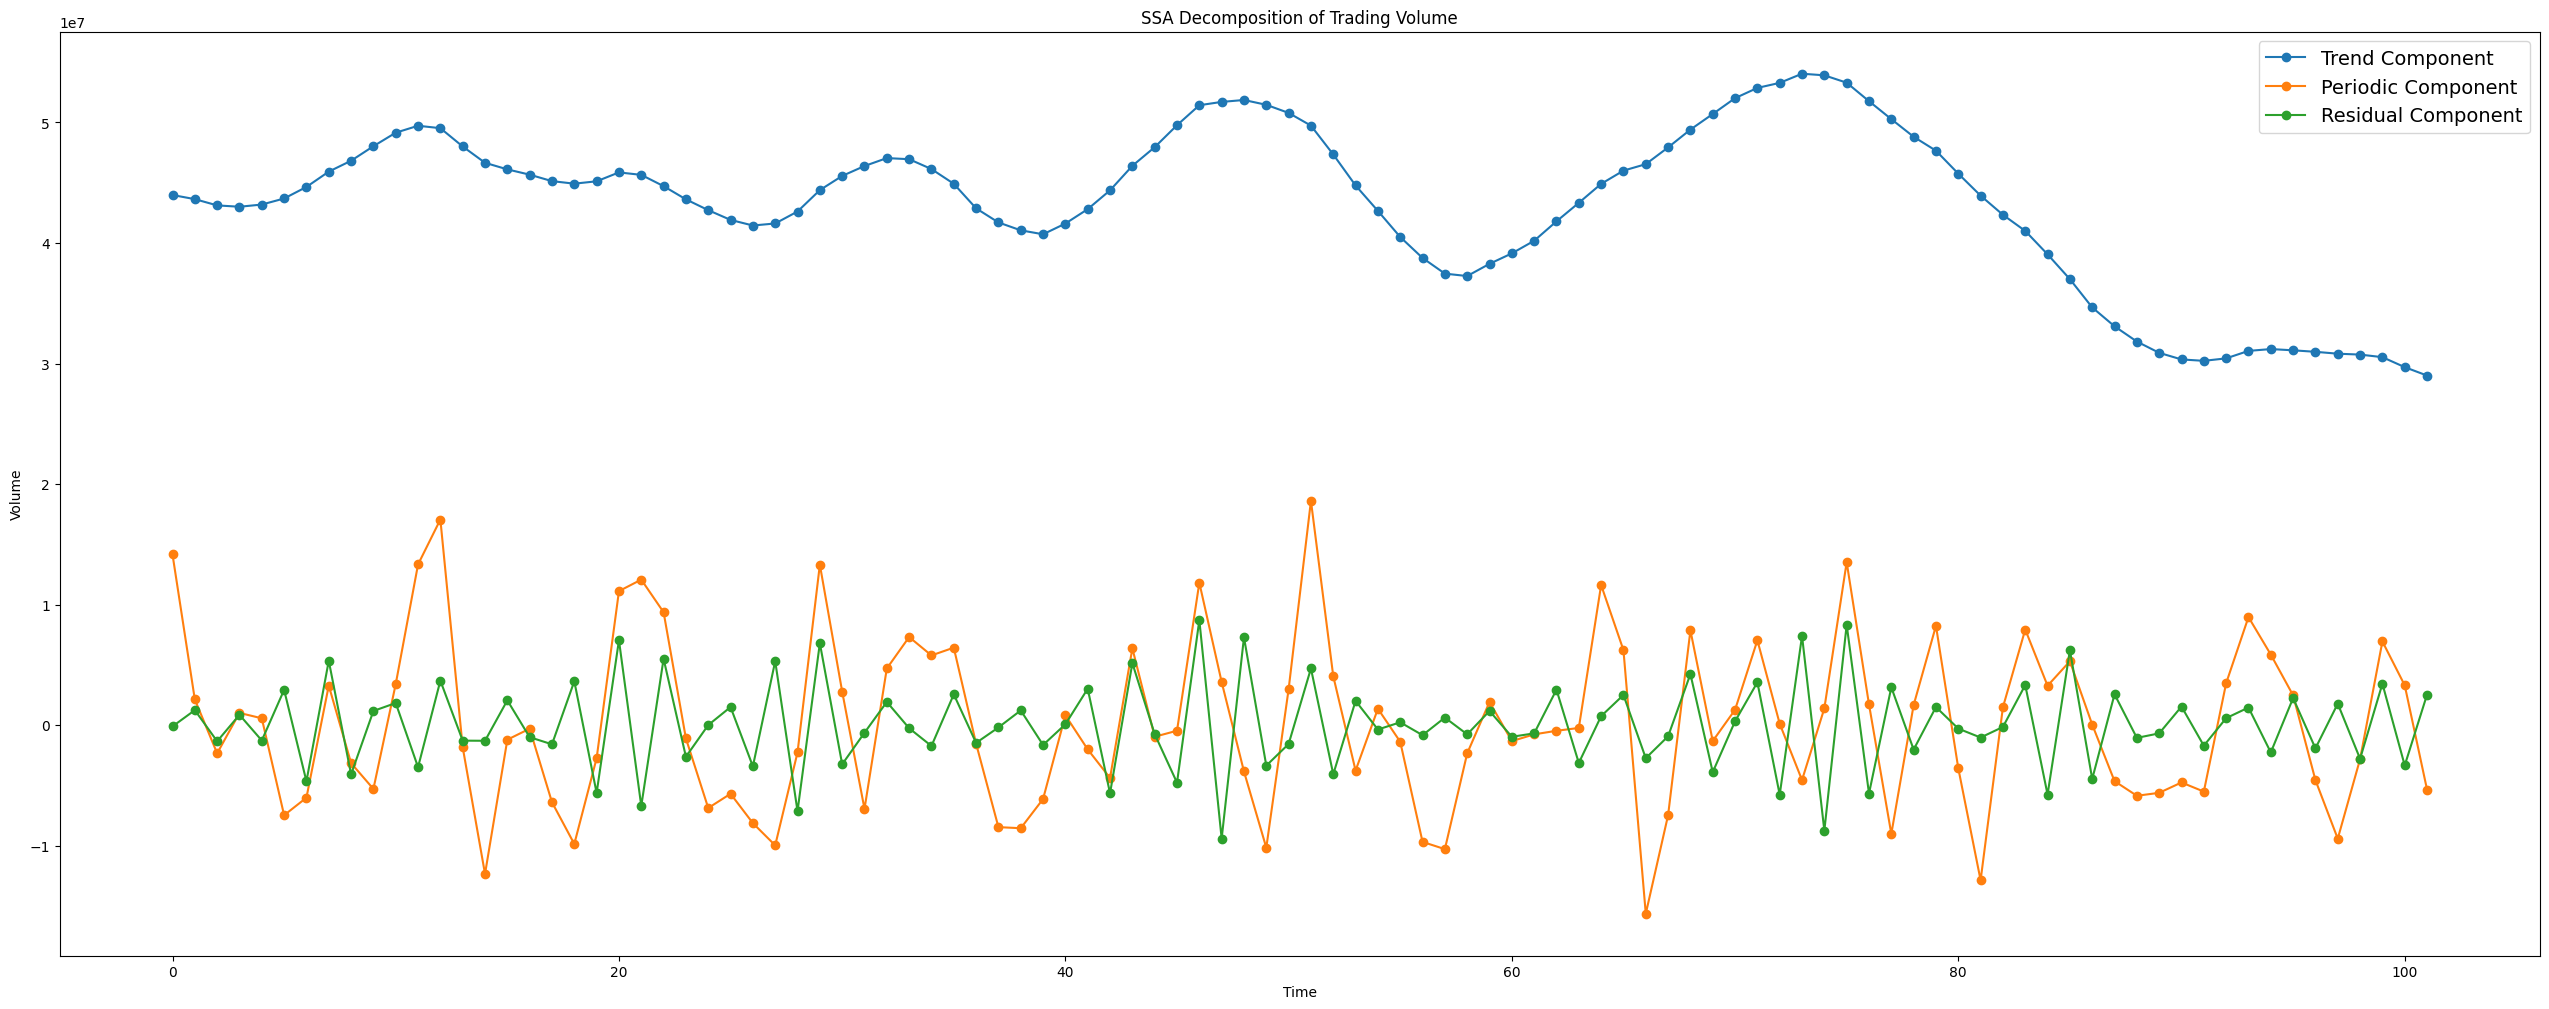

In [ ]:
#Singular Spectrum Analysis de Volumen

import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from pyts.decomposition import SingularSpectrumAnalysis

# Fetch historical data for a stock (AAPL in this example)
ticker_symbol = 'QQQ'
data = yf.download(ticker_symbol, start='2024-01-01', end='2024-05-29')

# Use the 'Volume' series for SSA
X = data['Volume'].values.reshape(1, -1)  # Reshape for compatibility with pyts

# Parameters for SSA
window_size = 7  # Adjust based on the characteristics of your data

# Perform Singular Spectrum Analysis
ssa = SingularSpectrumAnalysis(window_size=window_size, groups="auto")
X_ssa = ssa.fit_transform(X)

# Plotting the decomposed components
plt.figure(figsize=(32, 12))
labels = ['Trend Component', 'Periodic Component', 'Residual Component']
for i in range(3):  # Adjust the range as needed to explore different components
    plt.plot(X_ssa[0, i], 'o-', label=labels[i])
plt.legend(loc='best', fontsize=14)
plt.title('SSA Decomposition of Trading Volume')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.show()

[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/pywt/_cwt.py:121: FutureWarning: Wavelets from the family shan, without parameters specified in the name are deprecated. The name should takethe form shanB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: shan1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


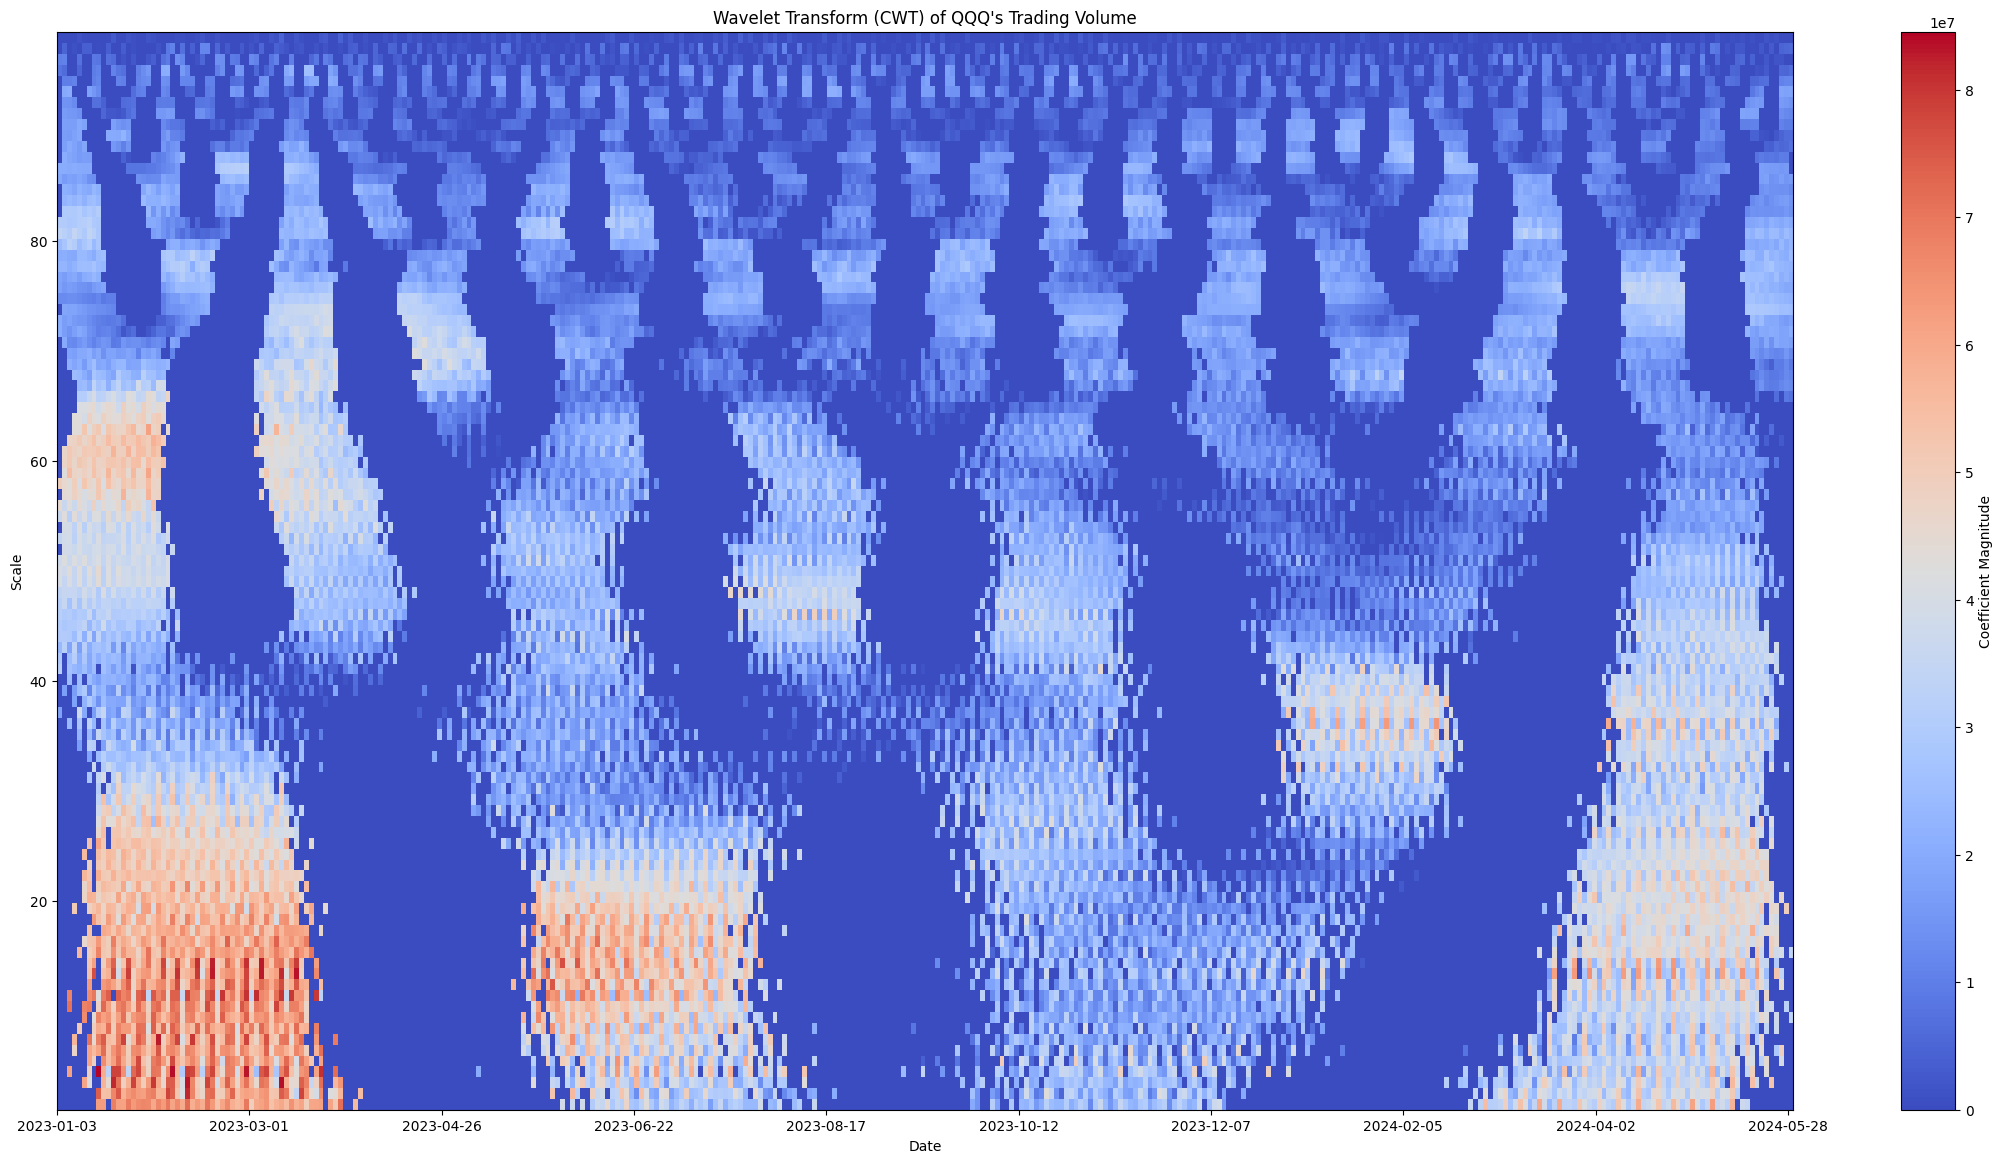

In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pywt

# Fetch historical market data
ticker_symbol = 'QQQ'  # Example: Apple Inc.
start_date = '2023-01-01'
end_date = '2024-05-29'
timeframe = '1d'
data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Use the 'Volume' data series for wavelet analysis
series = data['Volume'].values

# Define the scale range and wavelet for CWT
scales = np.arange(1, 100)  # Adjust based on your analysis needs
wavelet = 'shan'  # Complex Morlet wavelet

# Perform the Continuous Wavelet Transform (CWT)
coefficients, frequencies = pywt.cwt(series, scales, wavelet)

# Set negative coefficient values to zero
coefficients[coefficients < 0] = 0

# Plotting the wavelet transform result
plt.figure(figsize=(28, 14))
plt.imshow(np.abs(coefficients), extent=[0, len(series), 1, max(scales)], cmap='coolwarm', aspect='auto',
           vmax=abs(coefficients).max(), vmin=0)
plt.colorbar(label='Coefficient Magnitude')
plt.title(f"Wavelet Transform (CWT) of {ticker_symbol}'s Trading Volume")
plt.ylabel('Scale')

# Adjust X-axis to show dates
date_labels = data.index.strftime('%Y-%m-%d')
plt.xticks(ticks=np.linspace(0, len(series) - 1, num=10), labels=date_labels[np.linspace(0, len(series) - 1, num=10, dtype=int)])

plt.xlabel('Date')
plt.show()


[*********************100%%**********************]  1 of 1 completed


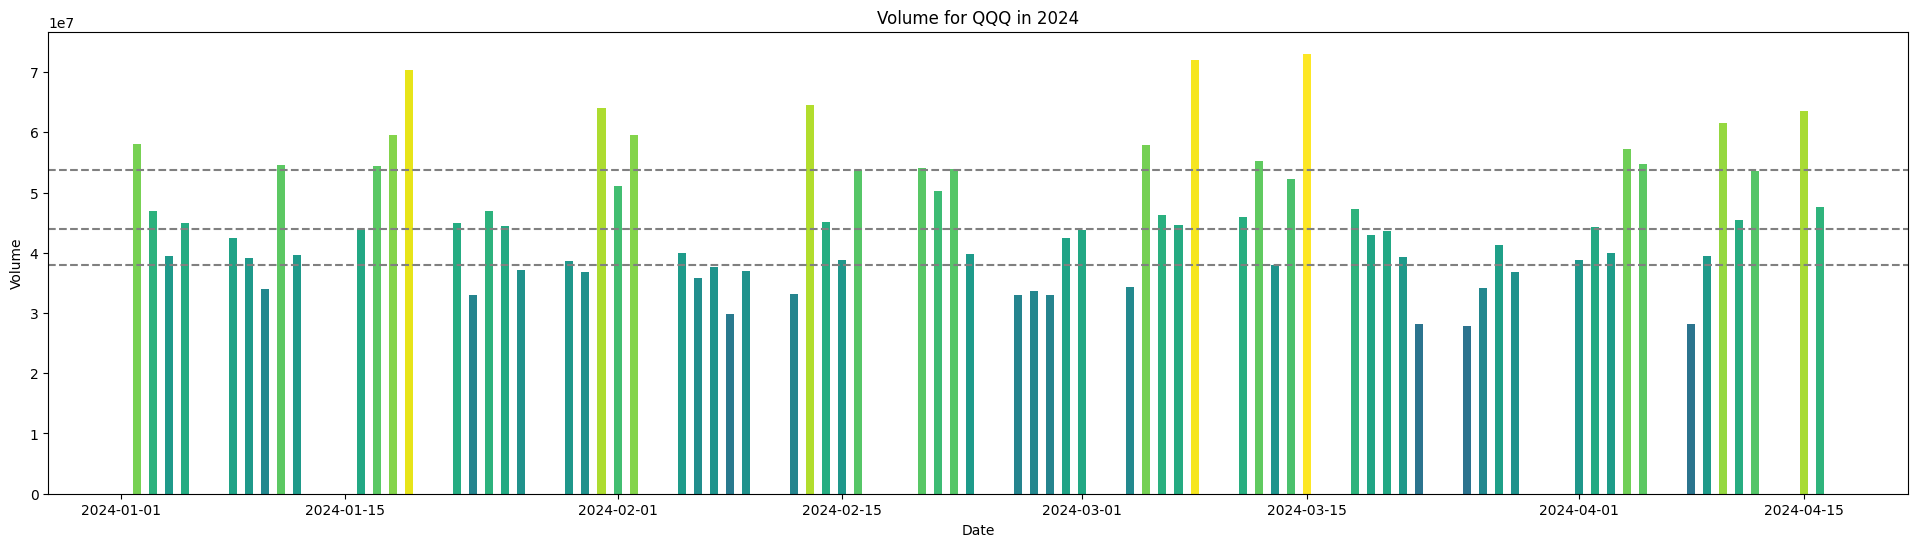

In [ ]:
#Analiza Volumen vs Quartile

import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

# Define ticker symbol, timeframe, and period
ticker_symbol = "QQQ"
timeframe = "1d"  # Daily data
start_date = "2024-01-01"
end_date = "2024-04-17"

# Fetch historical data
data = yf.download(ticker_symbol, start=start_date, end=end_date, interval=timeframe)

# Calculate percentiles
percentiles = np.percentile(data["Volume"], [25, 50, 75])

# Plot volume as bars and colorize based on percentile distribution
plt.figure(figsize=(24, 6))
bars = plt.bar(data.index, data["Volume"], color=plt.cm.viridis(data["Volume"] / data["Volume"].max()), width=0.5)

# Add median line
for percentile in percentiles:
    plt.axhline(percentile, color='gray', linestyle='--')

plt.xlabel("Date")
plt.ylabel("Volume")
plt.title(f"Volume for {ticker_symbol} in 2024")
plt.show()


# Volatilidad

[*********************100%%**********************]  1 of 1 completed


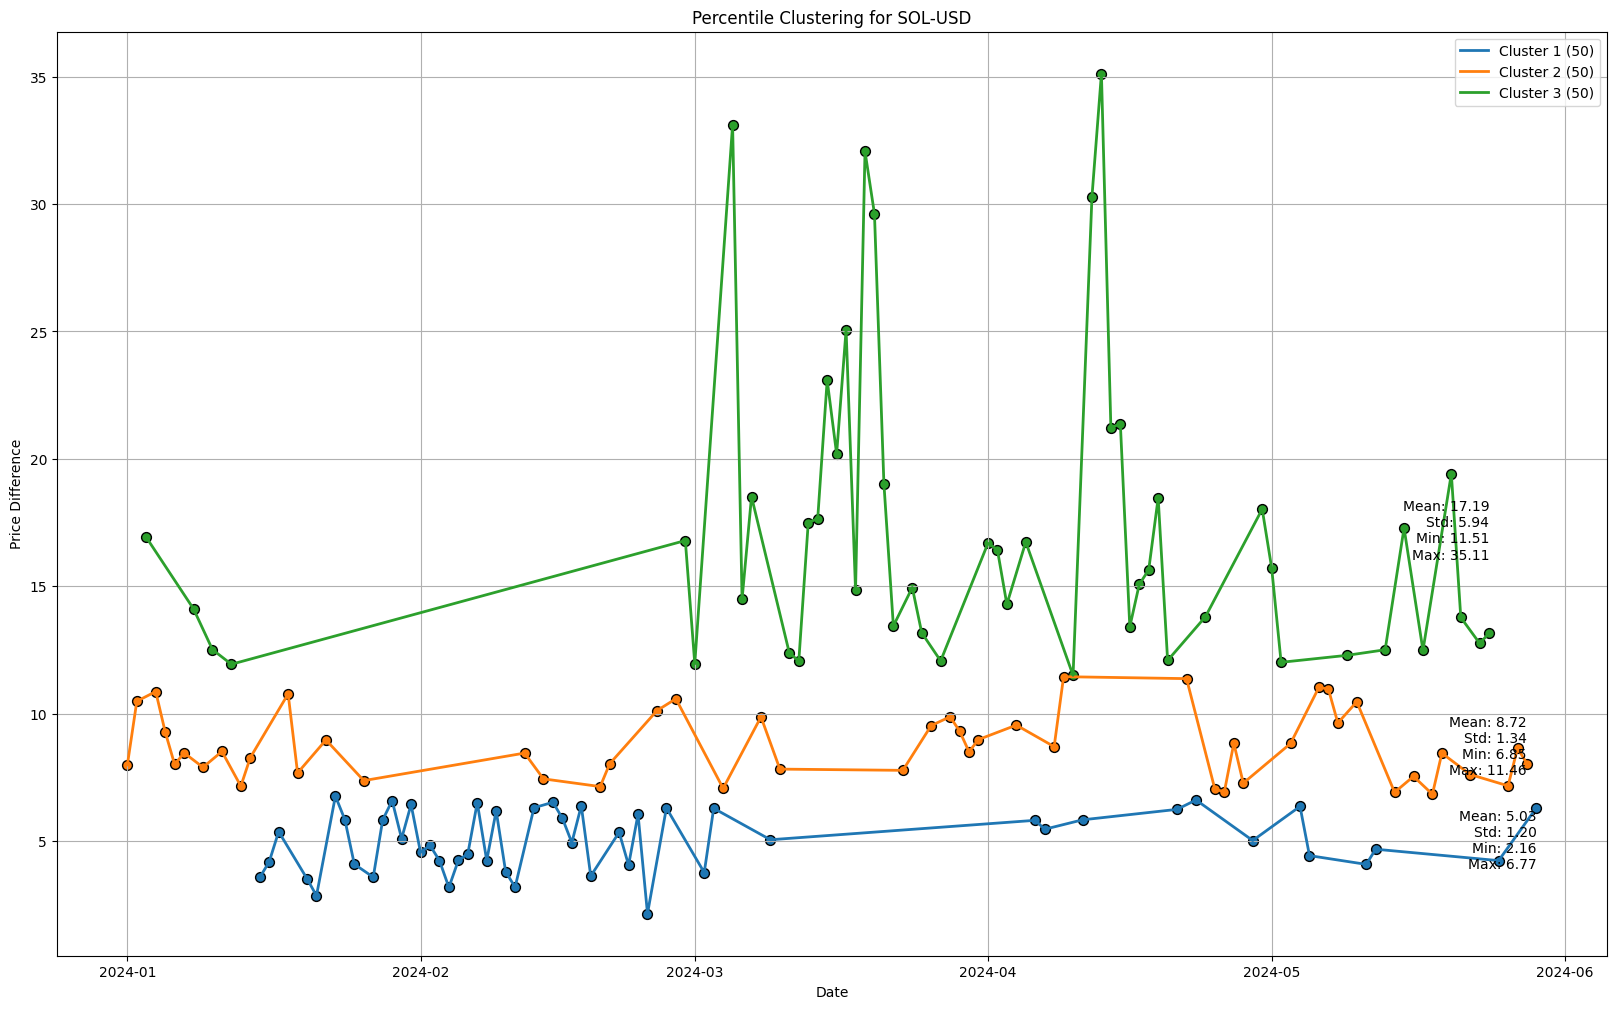

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

def fetch_stock_data(stock_symbol, interval, start_date, end_date):
    data = yf.download(stock_symbol, interval=interval, start=start_date, end=end_date)
    return data

def calculate_price_difference(data):
    data['Price_Difference'] = data['High'] - data['Low']

def preprocess_data(data):
    # No need to preprocess data for percentile clustering
    return data

def assign_percentile_cluster(data, n_clusters):
    # Calculate percentiles for Price_Difference
    data['Cluster'] = pd.qcut(data['Price_Difference'], q=n_clusters, labels=False)
    return data['Cluster']

def plot_clustering_results(data, cluster_labels, stock_symbol):
    plt.figure(figsize=(20, 12))
    for i in np.unique(cluster_labels):
        cluster_data = data[data['Cluster'] == i]
        cluster_stats = cluster_data['Price_Difference'].describe()
        plt.plot(cluster_data.index, cluster_data['Price_Difference'], label=f'Cluster {i+1} ({len(cluster_data)})', linewidth=2)
        plt.scatter(cluster_data.index, cluster_data['Price_Difference'], s=50, marker='o', edgecolors='k')
        plt.text(cluster_data.index[-1], cluster_stats['mean'], f"Mean: {cluster_stats['mean']:.2f}\nStd: {cluster_stats['std']:.2f}\nMin: {cluster_stats['min']:.2f}\nMax: {cluster_stats['max']:.2f}", fontsize=10, ha='right', va='center')
    plt.xlabel('Date')
    plt.ylabel('Price Difference')
    plt.title(f'Percentile Clustering for {stock_symbol}')
    plt.legend()
    plt.grid(True)
    plt.show()

def main():
    stock_symbol = 'SOL-USD'
    interval = '1D'
    start_date = '2024-01-01'
    end_date = '2024-05-30'
    n_clusters = 3

    data = fetch_stock_data(stock_symbol, interval, start_date, end_date)
    calculate_price_difference(data)

    cluster_labels = assign_percentile_cluster(data, n_clusters)

    plot_clustering_results(data, cluster_labels, stock_symbol)

if __name__ == "__main__":
    main()

In [ ]:
pip install pywt

ERROR: Could not find a version that satisfies the requirement pywt (from versions: none)
ERROR: No matching distribution found for pywt


[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/pywt/_cwt.py:121: FutureWarning: Wavelets of family fbsp, without parameters specified in the name are deprecated.  The name should take the form fbspM-B-C where M is the spline order and B, C are floats representing the bandwidth frequency and center frequency, respectively (example: fbsp1-1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


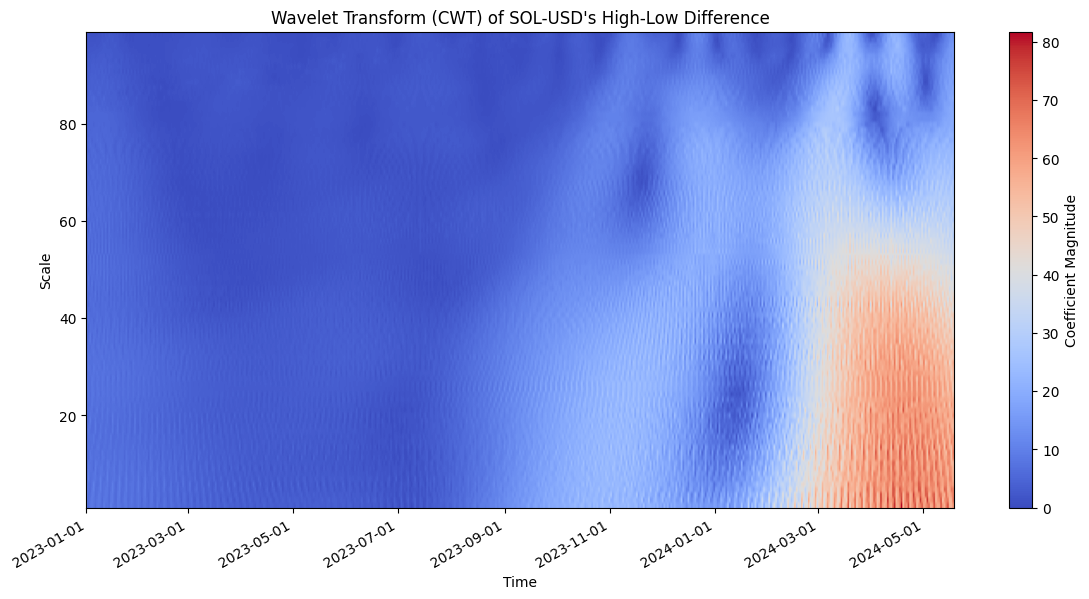

In [ ]:
#Wavelet para HL Difference. Permite visualizar frecuencia y ciclos de volatilidad.

import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pywt
import matplotlib.dates as mdates

# Define the stock ticker and the period for which to fetch data
ticker_symbol = 'SOL-USD'  # Example: Apple Inc.
start_date = '2023-01-01'
end_date = '2024-05-20'
timeframe = '1d'

# Fetch historical market data
data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Calculate High-Low Difference
data['HL_Diff'] = data['High'] - data['Low']

# Prepare the series for analysis
series = data['HL_Diff'].values
dates = data.index

# Define the scale range and wavelet
scales = np.arange(10, 100)  # Adjust based on your analysis needs
wavelet = 'fbsp'  # Complex Morlet wavelet

# Perform the Continuous Wavelet Transform (CWT)
coefficients, frequencies = pywt.cwt(series, scales, wavelet)

# Plotting the wavelet transform result
plt.figure(figsize=(14, 7))
plt.imshow(np.abs(coefficients), extent=[mdates.date2num(dates[0]), mdates.date2num(dates[-1]), 1, max(scales)], cmap='coolwarm', aspect='auto',
           vmax=abs(coefficients).max(), vmin=0)  # Set vmin to 0 to eliminate negative values
plt.colorbar(label='Coefficient Magnitude')
plt.title(f"Wavelet Transform (CWT) of {ticker_symbol}'s High-Low Difference")
plt.ylabel('Scale')

# Set up the date formatting for the x-axis
plt.gca().xaxis_date()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

plt.xlabel('Time')
plt.gcf().autofmt_xdate()  # Rotate date labels for better readability
plt.show()


In [ ]:
pip install pyts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 10.9 MB/s eta 0:00:00


[*********************100%%**********************]  1 of 1 completed


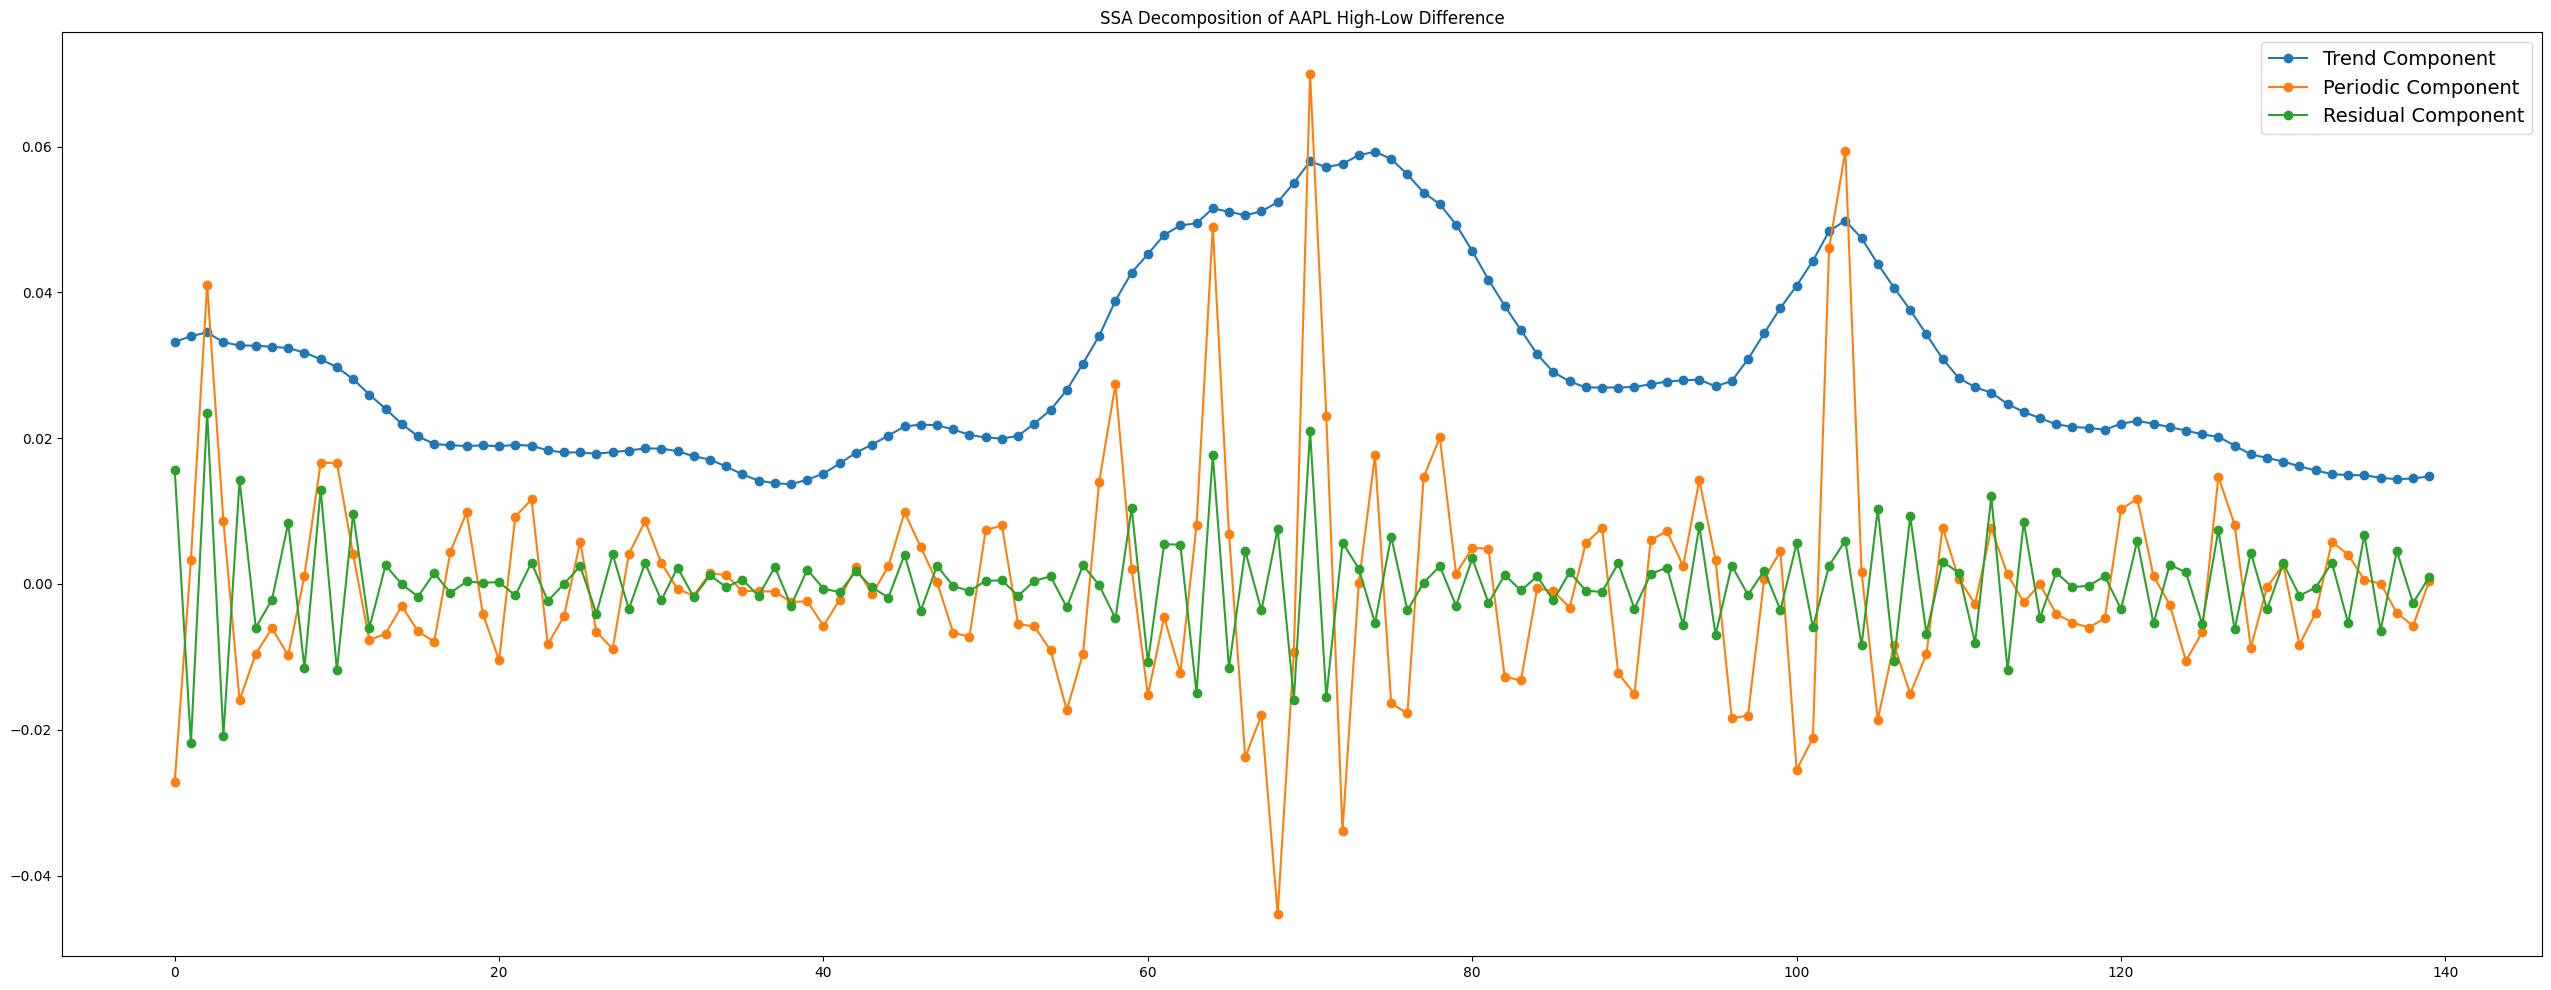

In [ ]:
#Singular Spectrum Analysis de volatilidad

import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from pyts.decomposition import SingularSpectrumAnalysis

# Fetch historical data for a stock (AAPL in this example)
ticker_symbol = 'XRP-USD'
data = yf.download(ticker_symbol, start='2024-01-01', end='2024-05-20')
timeframe = '1D'

# Calculate the High-Low Difference
data['HL_Diff'] = data['High'] - data['Low']

# Prepare the High-Low Difference series for SSA
X = data['HL_Diff'].values.reshape(1, -1)  # Reshape for compatibility with pyts

# Parameters for SSA
window_size = 7  # Adjust as needed

# Perform Singular Spectrum Analysis
ssa = SingularSpectrumAnalysis(window_size=window_size, groups="auto")
X_ssa = ssa.fit_transform(X)

# Displaying the first decomposed series as an example
plt.figure(figsize=(32, 12))
plt.plot(X_ssa[0, 0], 'o-', label='Trend Component')
plt.plot(X_ssa[0, 1], 'o-', label='Periodic Component')
plt.plot(X_ssa[0, 2], 'o-', label='Residual Component')
plt.legend(loc='best', fontsize=14)
plt.title('SSA Decomposition of AAPL High-Low Difference')
plt.show()

[*********************100%%**********************]  1 of 1 completed


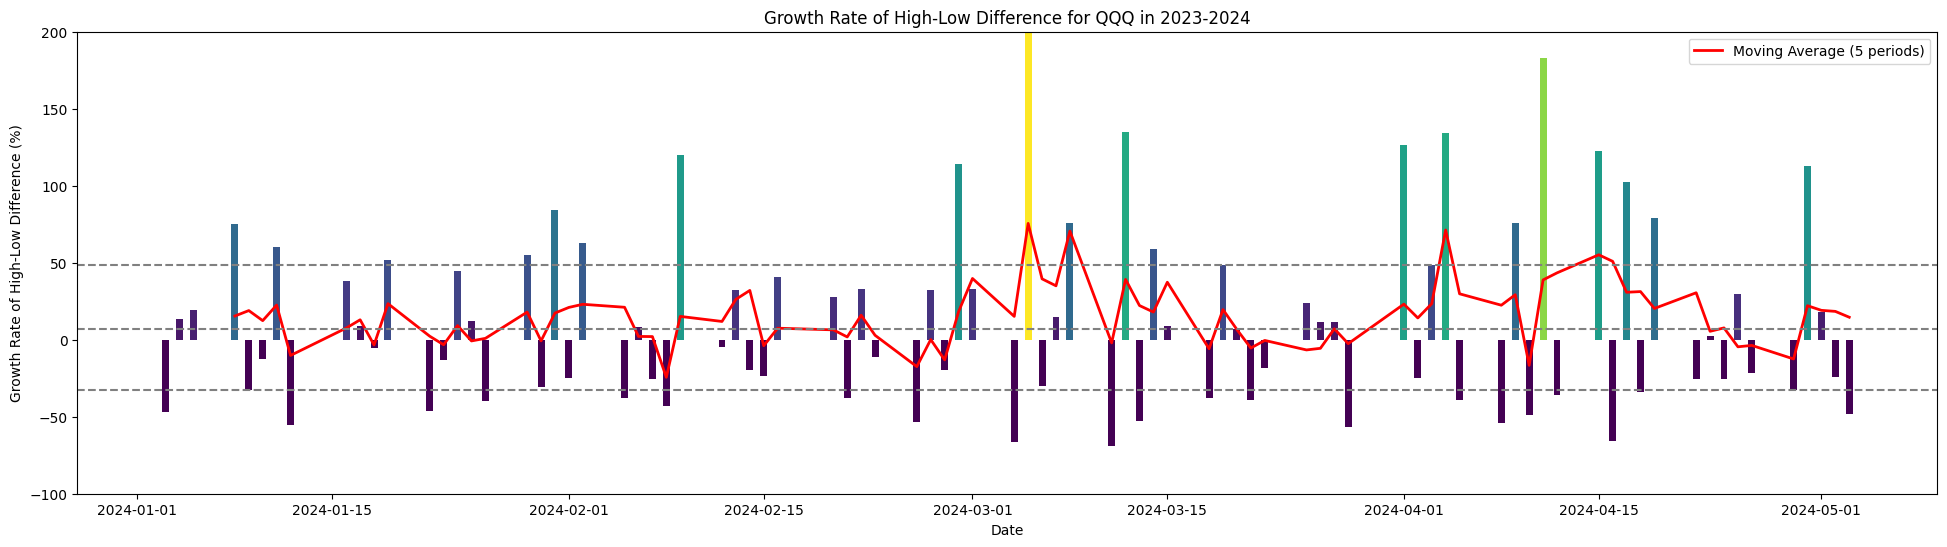

In [ ]:
#Mide ROC de volatilidad

import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

# Define ticker symbol, timeframe, and period
ticker_symbol = "NQ=F"
timeframe = "1D"  # Daily data
start_date = "2024-01-01"
end_date = "2024-05-05"

# Fetch historical data
data = yf.download(ticker_symbol, start=start_date, end=end_date, interval=timeframe)

# Calculate high-low difference
data["High_Low_Diff"] = data["High"] - data["Low"]

# Calculate growth rate of high-low difference
data["Growth_Rate_High_Low_Diff"] = data["High_Low_Diff"].pct_change() * 100

# Calculate moving average of growth rate
data["MA_5"] = data["Growth_Rate_High_Low_Diff"].rolling(window=4).mean()

# Calculate percentiles of growth rate
percentiles = np.percentile(data["Growth_Rate_High_Low_Diff"].dropna(), [25, 50, 75])

# Plot growth rate as bars and colorize based on percentile distribution
plt.figure(figsize=(24, 6))
bars = plt.bar(data.index, data["Growth_Rate_High_Low_Diff"], color=plt.cm.viridis(data["Growth_Rate_High_Low_Diff"] / data["Growth_Rate_High_Low_Diff"].max()), width=0.5)

# Add moving average line
plt.plot(data.index, data["MA_5"], color='red', linewidth=2, label='Moving Average (5 periods)')

# Add dashed lines at percentiles
for percentile in percentiles:
    plt.axhline(percentile, color='gray', linestyle='--')

plt.xlabel("Date")
plt.ylabel("Growth Rate of High-Low Difference (%)")
plt.title(f"Growth Rate of High-Low Difference for {ticker_symbol} in 2023-2024")
plt.legend()

# Set y-axis limit
plt.ylim(-100, 200)  # Example limit from -10 to 10
plt.show()

# Análisis de retornos y Clustering

[*********************100%%**********************]  1 of 1 completed


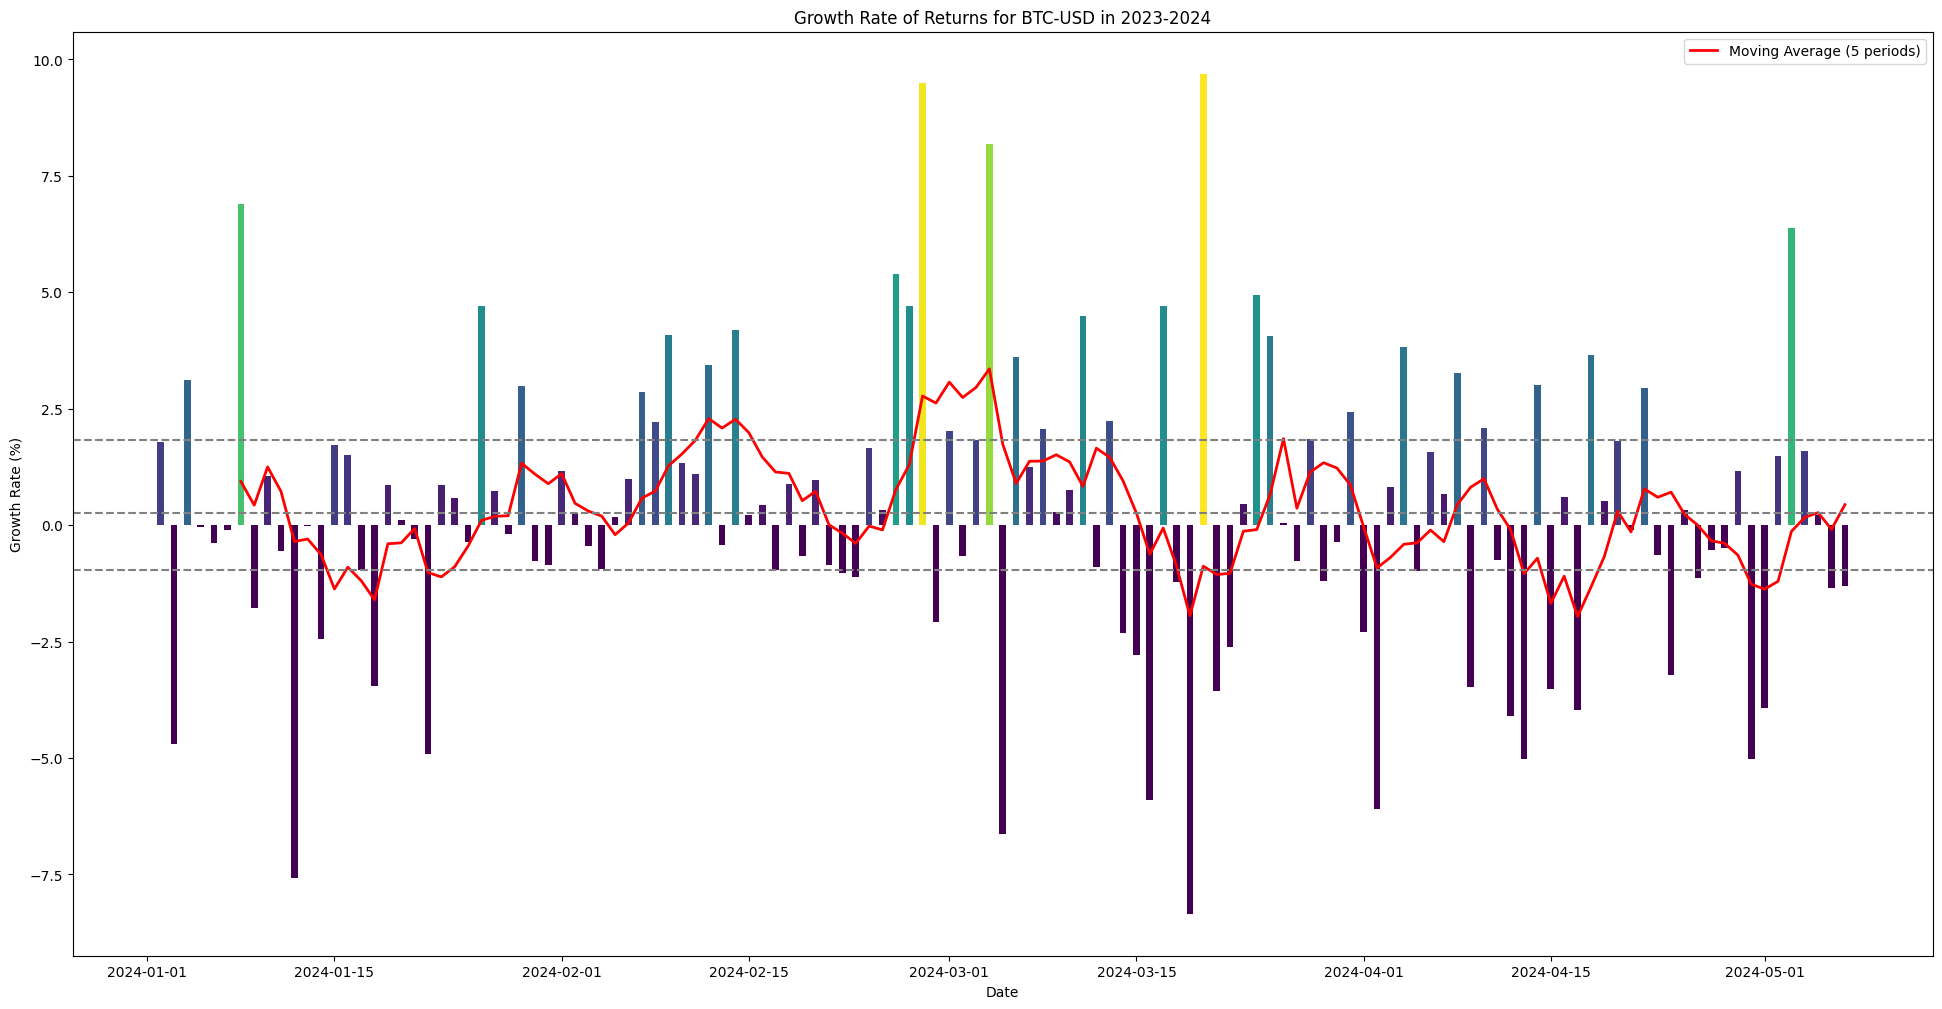

In [ ]:
#Analiza el Growth Rate de Returns y sus Cuartiles

import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

# Define ticker symbol, timeframe, and period
ticker_symbol = "BTC-USD"
timeframe = "1d"  # Daily data
start_date = "2024-01-01"
end_date = "2024-05-08"

# Fetch historical data
data = yf.download(ticker_symbol, start=start_date, end=end_date, interval=timeframe)

# Calculate growth rate of returns
data["Growth Rate"] = data["Close"].pct_change() * 100

# Calculate moving average of growth rate
data["MA_5"] = data["Growth Rate"].rolling(window=7).mean()

# Calculate percentiles of growth rate
percentiles = np.percentile(data["Growth Rate"].dropna(), [25, 50, 75])

# Plot growth rate as bars and colorize based on percentile distribution
plt.figure(figsize=(24, 12))
bars = plt.bar(data.index, data["Growth Rate"], color=plt.cm.viridis(data["Growth Rate"] / data["Growth Rate"].max()), width=0.5)

# Add moving average line
plt.plot(data.index, data["MA_5"], color='red', linewidth=2, label='Moving Average (5 periods)')

# Add dashed lines at percentiles
for percentile in percentiles:
    plt.axhline(percentile, color='gray', linestyle='--')

plt.xlabel("Date")
plt.ylabel("Growth Rate (%)")
plt.title(f"Growth Rate of Returns for {ticker_symbol} in 2023-2024")
plt.legend()
plt.show()

[*********************100%%**********************]  1 of 1 completed


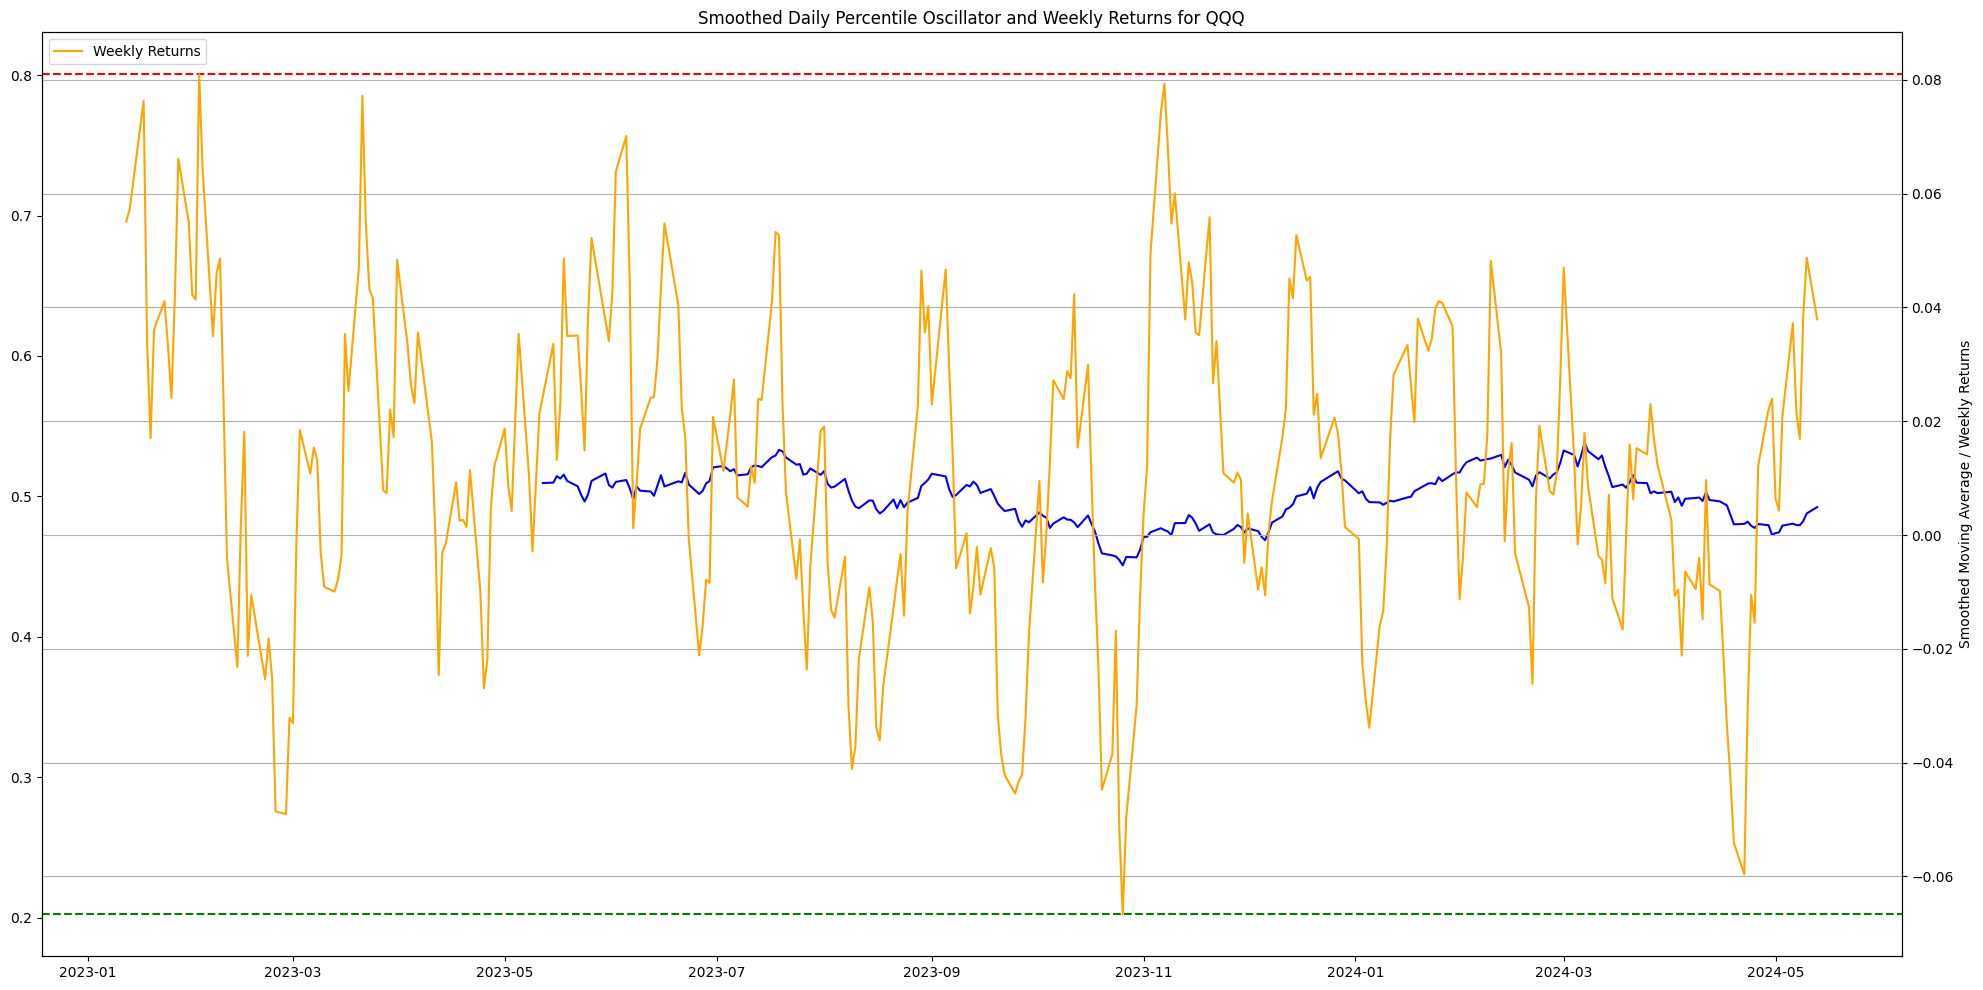

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define ticker symbol, timeframe, and period
ticker_symbol = "QQQ"
start_date = "2023-01-01"
end_date = "2024-05-14"
timeframe_tf = "1d"

# Fetch daily historical data
data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Calculate daily returns
data["Daily_Returns"] = data["Adj Close"].pct_change() * 100

# Calculate weekly returns
data["Weekly_Returns"] = data["Adj Close"].pct_change(periods=7)

# Calculate percentile ranks of daily returns
data["Daily_Return_Percentile"] = data["Daily_Returns"].rank(pct=True)

# Calculate percentile ranks of weekly returns
data["Weekly_Return_Percentile"] = data["Weekly_Returns"].rank(pct=True)

# Smooth the percentile oscillator of daily returns using a moving average
data["Smoothed_Daily_Percentile_MA"] = data["Daily_Return_Percentile"].rolling(window=90).mean()

# Define overbought and oversold zones based on daily percentiles
daily_overbought_percentile = 0.8
daily_oversold_percentile = 0.2

# Calculate corresponding values for daily overbought and oversold zones
daily_overbought_value = data["Daily_Return_Percentile"].quantile(daily_overbought_percentile)
daily_oversold_value = data["Daily_Return_Percentile"].quantile(daily_oversold_percentile)

# Plot the smoothed percentile oscillator of daily returns using moving average with overbought and oversold levels
plt.figure(figsize=(24, 12))
plt.plot(data.index, data["Smoothed_Daily_Percentile_MA"], color='blue', label='Smoothed Daily Percentile Oscillator (Moving Average)')
plt.axhline(y=daily_overbought_value, color='red', linestyle='--', label=f'Daily Overbought Level ({daily_overbought_percentile * 100:.2f} percentile)')
plt.axhline(y=daily_oversold_value, color='green', linestyle='--', label=f'Daily Oversold Level ({daily_oversold_percentile * 100:.2f} percentile)')

# Plot the weekly returns on a secondary y-axis
ax2 = plt.gca().twinx()
ax2.plot(data.index, data["Weekly_Returns"], color='orange', label='Weekly Returns')

plt.xlabel("Date")
plt.ylabel("Smoothed Moving Average / Weekly Returns")
plt.title(f"Smoothed Daily Percentile Oscillator and Weekly Returns for {ticker_symbol}")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

[*********************100%%**********************]  1 of 1 completed


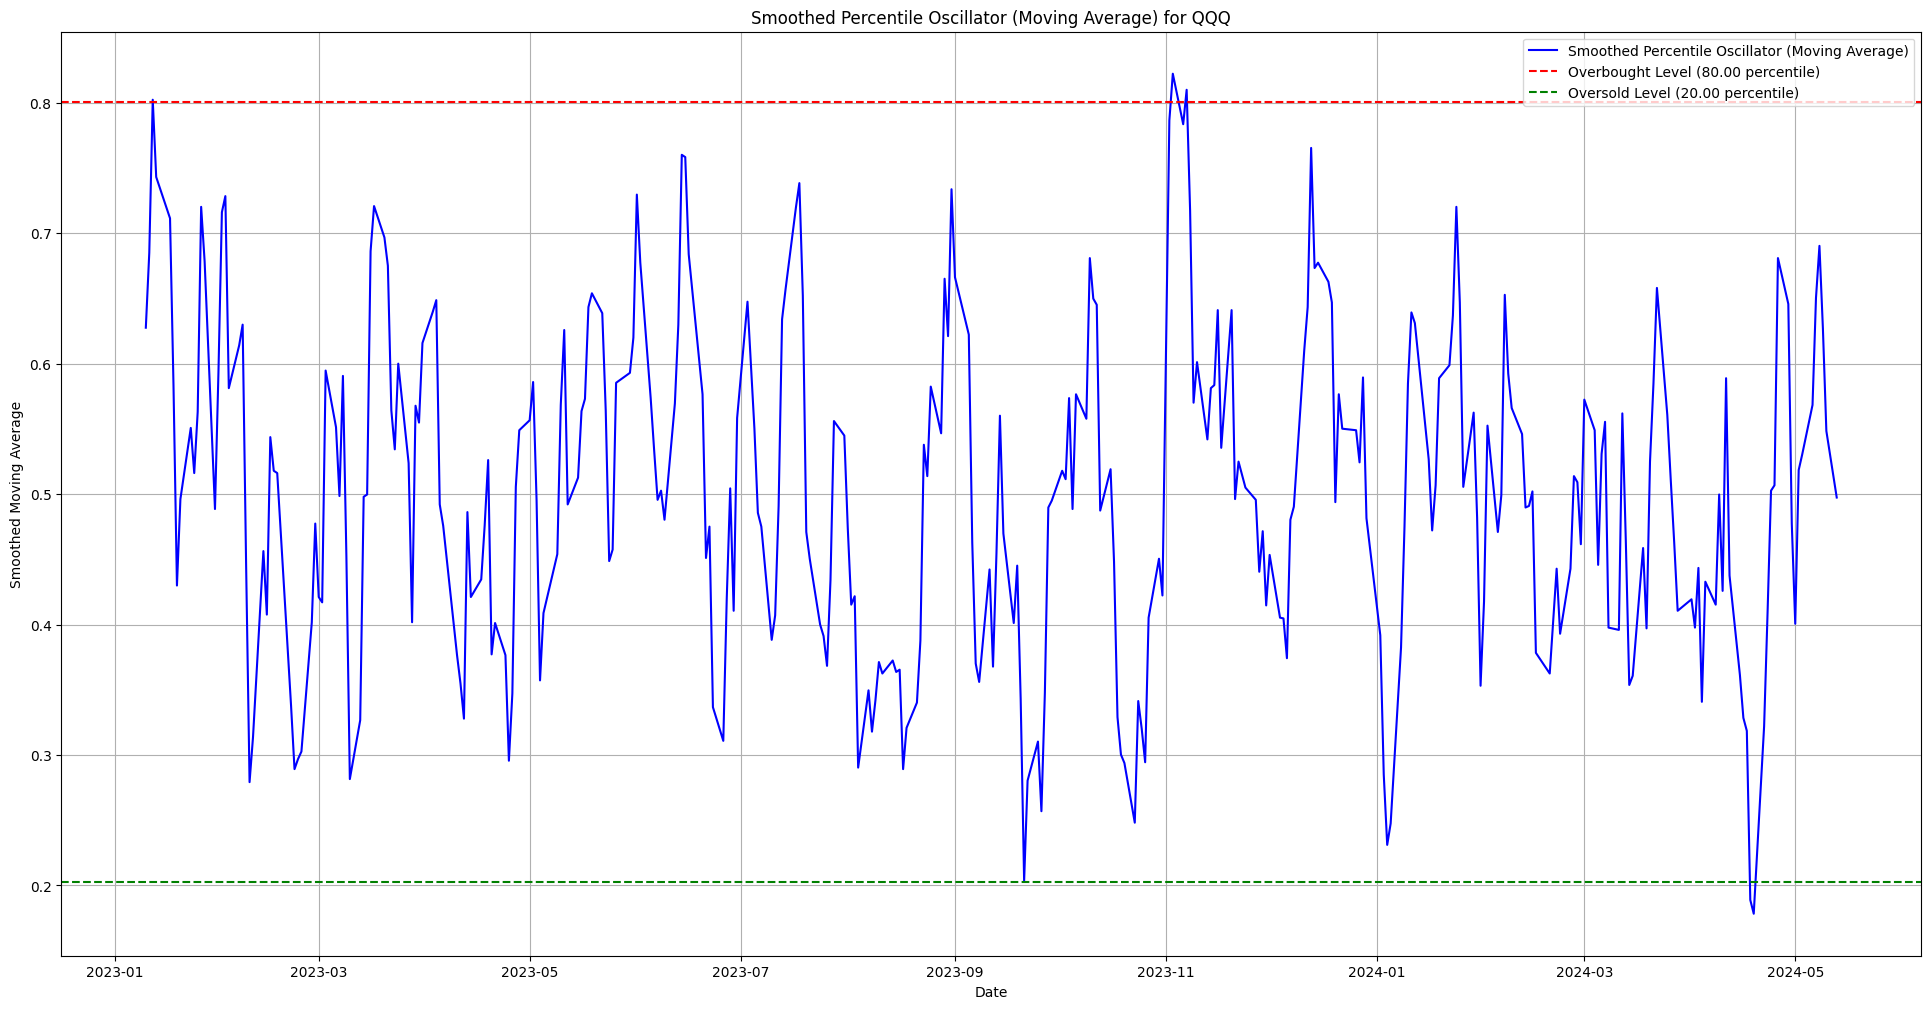

In [ ]:
#Suaviza y compara el retorno de los últimos 5 periods vs percentile

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define ticker symbol, timeframe, and period
ticker_symbol = "QQQ"
start_date = "2023-01-01"
end_date = "2024-05-14"
timeframe_tf = "1wk"

# Fetch daily historical data
data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Calculate daily returns
data["Returns"] = data["Adj Close"].pct_change() * 100

# Calculate percentile ranks of returns
data["Return_Percentile"] = data["Returns"].rank(pct=True)

# Smooth the percentile oscillator using a moving average
data["Smoothed_Percentile_MA"] = data["Return_Percentile"].rolling(window=5).mean()

# Define overbought and oversold zones based on percentiles
overbought_percentile = 0.8
oversold_percentile = 0.2

# Calculate corresponding values for overbought and oversold zones
overbought_value = data["Return_Percentile"].quantile(overbought_percentile)
oversold_value = data["Return_Percentile"].quantile(oversold_percentile)

# Plot the smoothed percentile oscillator using moving average with overbought and oversold levels
plt.figure(figsize=(24, 12))
plt.plot(data.index, data["Smoothed_Percentile_MA"], color='blue', label='Smoothed Percentile Oscillator (Moving Average)')
plt.axhline(y=overbought_value, color='red', linestyle='--', label=f'Overbought Level ({overbought_percentile * 100:.2f} percentile)')
plt.axhline(y=oversold_value, color='green', linestyle='--', label=f'Oversold Level ({oversold_percentile * 100:.2f} percentile)')
plt.xlabel("Date")
plt.ylabel("Smoothed Moving Average")
plt.title(f"Smoothed Percentile Oscillator (Moving Average) for {ticker_symbol}")
plt.legend()
plt.grid(True)
plt.show()

# Wavelets | Volume and Volatility

# Trends

In [ ]:
pip install yfinance pandas numpy

[*********************100%%**********************]  1 of 1 completed


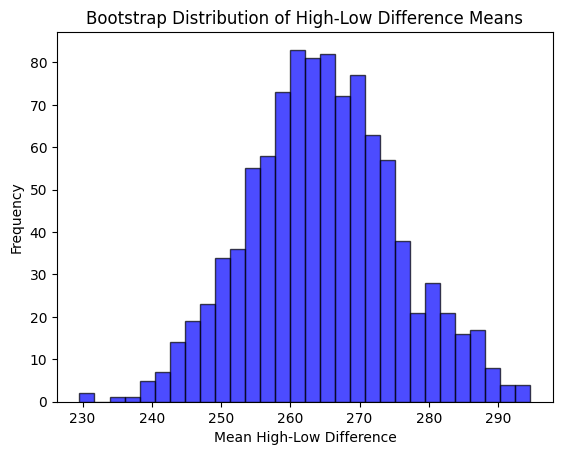

In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample

# Function to download data and calculate high-low difference
def get_stock_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    data['High-Low'] = data['High'] - data['Low']
    return data

# Function to perform bootstrapping on High-Low Difference
def bootstrap_high_low_diff(data, n_bootstrap=1000):
    bootstrapped_means = []
    high_low_diff = data['High-Low'].values
    for _ in range(n_bootstrap):
        bootstrapped_sample = resample(high_low_diff)
        bootstrapped_mean = np.mean(bootstrapped_sample)
        bootstrapped_means.append(bootstrapped_mean)
    return bootstrapped_means

# Function to plot the distribution of bootstrapped High-Low Difference means
def plot_bootstrap_distribution(bootstrapped_means, title):
    plt.hist(bootstrapped_means, bins=30, color='blue', edgecolor='black', alpha=0.7)
    plt.title(title)
    plt.xlabel('Mean High-Low Difference')
    plt.ylabel('Frequency')
    plt.show()

# Parameters
ticker = 'NQ=F'
start_date = '2024-01-01'
end_date = '2024-05-21'
n_bootstrap = 1000  # Number of bootstrap samples

# Get the stock data
data = get_stock_data(ticker, start_date, end_date)

# Perform bootstrapping on High-Low Difference
bootstrapped_means = bootstrap_high_low_diff(data, n_bootstrap)

# Plot the distribution of bootstrapped means
plot_bootstrap_distribution(bootstrapped_means, 'Bootstrap Distribution of High-Low Difference Means')


[*********************100%%**********************]  1 of 1 completed


Mean Squared Error: 77146.96327784889


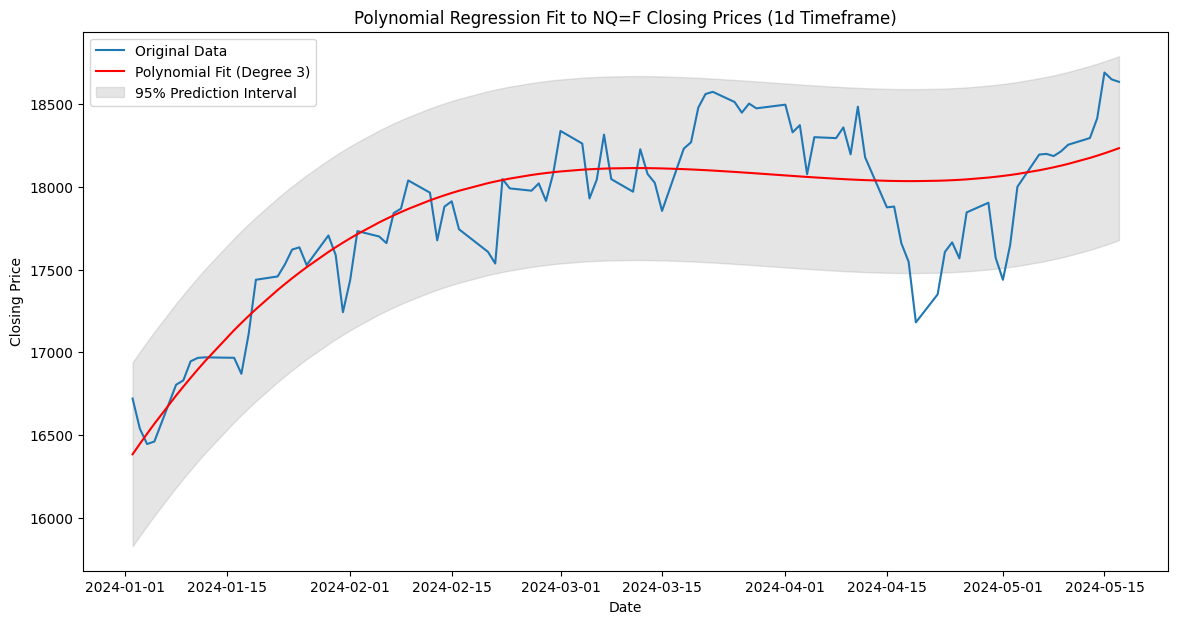

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define the stock ticker and the period for which to fetch data
ticker_symbol = 'NQ=F'  # Example: Apple Inc.
start_date = '2024-01-01'
end_date = '2024-05-20'
timeframe = '1d'  # You can change this to '1wk', '1mo', '1h', etc.

# Fetch historical market data with the specified timeframe
data = yf.download(ticker_symbol, start=start_date, end=end_date, interval=timeframe)

# Ensure the data is valid for non-daily intervals by resetting the index and handling missing data
data.dropna(inplace=True)
data.reset_index(inplace=True)

# Use the closing prices as the data to fit
data['Days'] = (data['Date'] - data['Date'].min()).dt.days  # Convert dates to number of days

# Create polynomial features
degree = 3
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(data[['Days']])

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, data['Close'])

# Predict using the model
data['Poly_Pred'] = model.predict(X_poly)

# Calculate the standard error of the estimate
pred_errors = data['Close'] - data['Poly_Pred']
se = np.sqrt(np.sum(pred_errors**2) / (len(data) - (degree + 1)))

# Calculate the prediction interval
confidence_level = 1.96  # For 95% confidence interval
data['Lower_Bound'] = data['Poly_Pred'] - confidence_level * se
data['Upper_Bound'] = data['Poly_Pred'] + confidence_level * se

# Evaluate the model
mse = mean_squared_error(data['Close'], data['Poly_Pred'])
print(f'Mean Squared Error: {mse}')

# Plot the original data, the polynomial regression fit, and the prediction interval
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Original Data')
plt.plot(data['Date'], data['Poly_Pred'], color='red', label=f'Polynomial Fit (Degree {degree})')
plt.fill_between(data['Date'], data['Lower_Bound'], data['Upper_Bound'], color='grey', alpha=0.2, label='95% Prediction Interval')
plt.title(f'Polynomial Regression Fit to {ticker_symbol} Closing Prices ({timeframe} Timeframe)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()



# Experimentos

In [ ]:
pip install scipy

[*********************100%%**********************]  1 of 1 completed


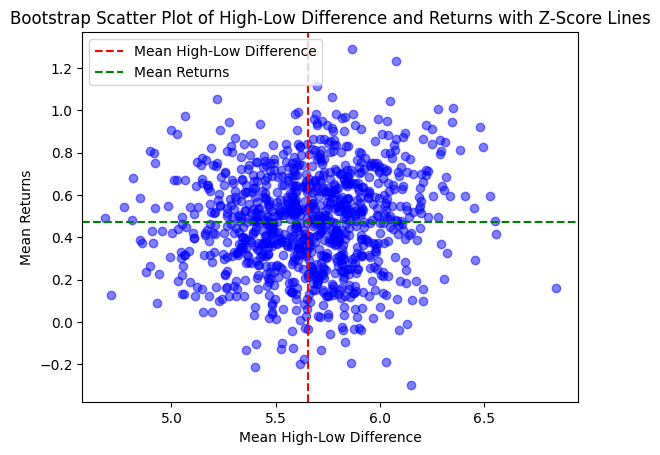

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample

# Function to download data and calculate high-low difference and returns
def get_stock_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    data['High-Low'] = data['High'] - data['Low']
    data['Returns'] = data['Close'].diff().dropna()  # Calculate absolute returns
    data = data.dropna()  # Drop any rows with NaN values
    return data

# Function to perform bootstrapping and collect bootstrapped samples
def bootstrap_samples(data, n_bootstrap=1000):
    bootstrapped_samples = []
    high_low_diff = data['High-Low'].values
    returns = data['Returns'].values
    for _ in range(n_bootstrap):
        indices = np.arange(len(data))
        bootstrapped_indices = resample(indices)
        bootstrapped_sample_high_low = high_low_diff[bootstrapped_indices]
        bootstrapped_sample_returns = returns[bootstrapped_indices]
        bootstrapped_samples.append((bootstrapped_sample_high_low.mean(), bootstrapped_sample_returns.mean()))
    return bootstrapped_samples

# Function to calculate Z-Score
def calculate_z_score(data):
    return (data - np.mean(data)) / np.std(data)

# Function to plot the scatter plot of bootstrapped samples with Z-Score lines
def plot_bootstrap_scatter_with_z_score(bootstrapped_samples, title):
    high_low_means = [sample[0] for sample in bootstrapped_samples]
    returns_means = [sample[1] for sample in bootstrapped_samples]

    # Calculate Z-Scores
    high_low_z = calculate_z_score(high_low_means)
    returns_z = calculate_z_score(returns_means)

    # Plot scatter plot
    plt.scatter(high_low_means, returns_means, color='blue', alpha=0.5)

    # Plot Z-Score lines
    plt.axvline(np.mean(high_low_means), color='red', linestyle='--', label='Mean High-Low Difference')
    plt.axhline(np.mean(returns_means), color='green', linestyle='--', label='Mean Returns')

    plt.title(title)
    plt.xlabel('Mean High-Low Difference')
    plt.ylabel('Mean Returns')
    plt.legend()
    plt.show()

# Parameters
ticker = 'SOL-USD'
start_date = '2023-05-21'
end_date = '2024-05-21'
n_bootstrap = 1000  # Number of bootstrap samples

# Get the stock data
data = get_stock_data(ticker, start_date, end_date)

# Perform bootstrapping and collect bootstrapped samples
bootstrapped_samples = bootstrap_samples(data, n_bootstrap)

# Plot the scatter plot of bootstrapped samples with Z-Score lines
plot_bootstrap_scatter_with_z_score(bootstrapped_samples, 'Bootstrap Scatter Plot of High-Low Difference and Returns with Z-Score Lines')


[*********************100%%**********************]  1 of 1 completed


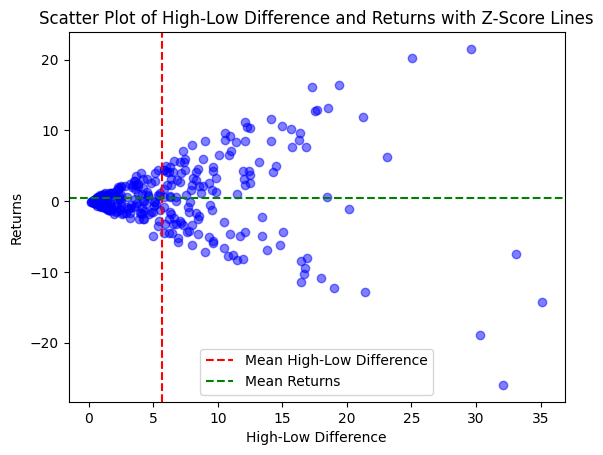

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to download data and calculate high-low difference and returns
def get_stock_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    data['High-Low'] = data['High'] - data['Low']
    data['Returns'] = data['Close'].diff().dropna()  # Calculate absolute returns
    data = data.dropna()  # Drop any rows with NaN values
    return data

# Function to calculate Z-Score
def calculate_z_score(data):
    return (data - np.mean(data)) / np.std(data)

# Function to plot the scatter plot of returns and high-low difference with Z-Score lines
def plot_scatter_with_z_score(data, title):
    high_low_diff = data['High-Low']
    returns = data['Returns']

    # Calculate Z-Scores
    high_low_z = calculate_z_score(high_low_diff)
    returns_z = calculate_z_score(returns)

    # Plot scatter plot
    plt.scatter(high_low_diff, returns, color='blue', alpha=0.5)

    # Plot Z-Score lines
    plt.axvline(np.mean(high_low_diff), color='red', linestyle='--', label='Mean High-Low Difference')
    plt.axhline(np.mean(returns), color='green', linestyle='--', label='Mean Returns')

    plt.title(title)
    plt.xlabel('High-Low Difference')
    plt.ylabel('Returns')
    plt.legend()
    plt.show()

# Parameters
ticker = 'SOL-USD'
start_date = '2023-05-21'
end_date = '2024-05-21'

# Get the stock data
data = get_stock_data(ticker, start_date, end_date)

# Plot the scatter plot of returns and high-low difference with Z-Score lines
plot_scatter_with_z_score(data, 'Scatter Plot of High-Low Difference and Returns with Z-Score Lines')


[*********************100%%**********************]  1 of 1 completed


Mean Daily Return (USD): -0.0008410587906837463
Standard Deviation of Daily Returns (USD): 0.020664419360230595
Upper Bound (Mean + 2 * Std) (USD): 0.040487779929777444
Lower Bound (Mean - 2 * Std) (USD): -0.04216989751114494
Chebyshev's Inequality Probability Bound: 0.25


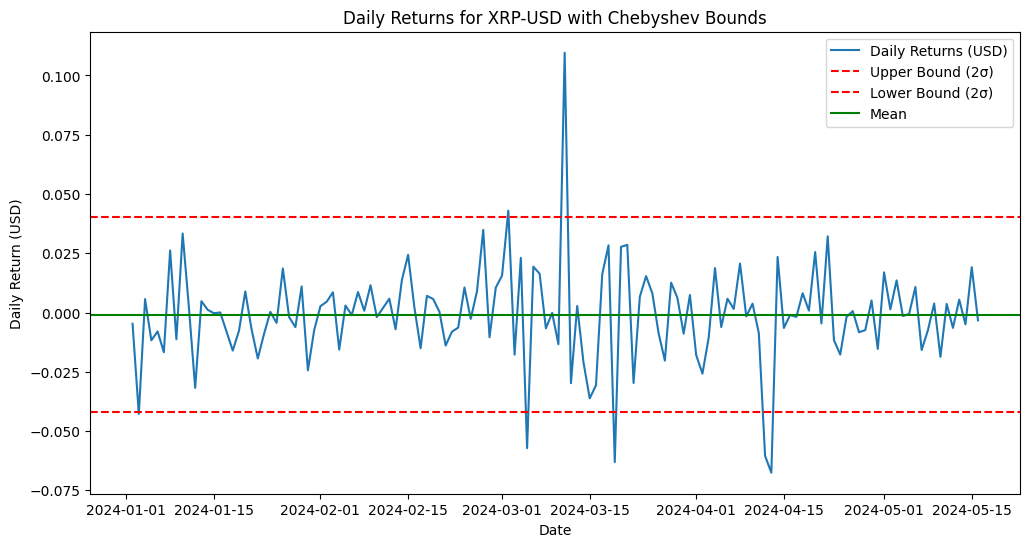

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Fetch historical stock data
ticker = "XRP-USD"  # Example: Apple Inc.
data = yf.download(ticker, start="2024-01-01", end="2024-05-17")

# Calculate daily returns in USD
data['Returns'] = data['Close'].diff()

# Remove NaN values resulting from the diff calculation
data = data.dropna()

# Calculate mean and standard deviation of daily returns
mean_return = data['Returns'].mean()
std_return = data['Returns'].std()

# Apply Chebyshev's Inequality
k = 2  # Number of standard deviations
upper_bound = mean_return + k * std_return
lower_bound = mean_return - k * std_return

# Probability bound according to Chebyshev's Inequality
prob_bound = 1 / k**2

# Print results
print(f"Mean Daily Return (USD): {mean_return}")
print(f"Standard Deviation of Daily Returns (USD): {std_return}")
print(f"Upper Bound (Mean + {k} * Std) (USD): {upper_bound}")
print(f"Lower Bound (Mean - {k} * Std) (USD): {lower_bound}")
print(f"Chebyshev's Inequality Probability Bound: {prob_bound}")

# Plot daily returns with bounds
plt.figure(figsize=(12, 6))
plt.plot(data['Returns'], label='Daily Returns (USD)')
plt.axhline(upper_bound, color='r', linestyle='--', label=f'Upper Bound ({k}σ)')
plt.axhline(lower_bound, color='r', linestyle='--', label=f'Lower Bound ({k}σ)')
plt.axhline(mean_return, color='g', linestyle='-', label='Mean')
plt.legend()
plt.title(f'Daily Returns for {ticker} with Chebyshev Bounds')
plt.xlabel('Date')
plt.ylabel('Daily Return (USD)')
plt.show()

[*********************100%%**********************]  1 of 1 completed


Mean High-Low Difference: 4.538590653737386
Standard Deviation of High-Low Difference: 5.446088082300059
Upper Bound (Mean + 2 * Std): 15.430766818337503
Lower Bound (Mean - 2 * Std): -6.3535855108627315
Number of days above mean: 169 (33.14%)
Number of days below mean: 341 (66.86%)


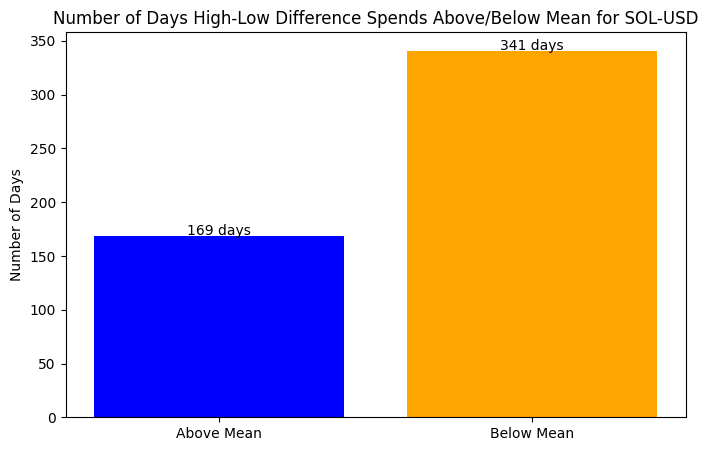

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Fetch historical stock data
ticker = "SOL-USD"  # Example: Solana in USD
data = yf.download(ticker, start="2023-01-01", end="2024-05-25")

# Calculate High-Low Difference
data['High_Low_Diff'] = data['High'] - data['Low']

# Calculate mean and standard deviation of High-Low Difference
mean_diff = data['High_Low_Diff'].mean()
std_diff = data['High_Low_Diff'].std()

# Calculate the number of days above and below the mean
days_above_mean = (data['High_Low_Diff'] > mean_diff).sum()
days_below_mean = (data['High_Low_Diff'] < mean_diff).sum()
total_days = len(data)

# Calculate the percentages
percent_above_mean = (days_above_mean / total_days) * 100
percent_below_mean = (days_below_mean / total_days) * 100

# Print results
print(f"Mean High-Low Difference: {mean_diff}")
print(f"Standard Deviation of High-Low Difference: {std_diff}")
print(f"Upper Bound (Mean + 2 * Std): {mean_diff + 2 * std_diff}")
print(f"Lower Bound (Mean - 2 * Std): {mean_diff - 2 * std_diff}")
print(f"Number of days above mean: {days_above_mean} ({percent_above_mean:.2f}%)")
print(f"Number of days below mean: {days_below_mean} ({percent_below_mean:.2f}%)")

# Plot the number of days above and below mean
categories = ['Above Mean', 'Below Mean']
values = [days_above_mean, days_below_mean]

plt.figure(figsize=(8, 5))
plt.bar(categories, values, color=['blue', 'orange'])
plt.title(f'Number of Days High-Low Difference Spends Above/Below Mean for {ticker}')
plt.ylabel('Number of Days')
for i, value in enumerate(values):
    plt.text(i, value + 1, f'{value} days', ha='center')
plt.show()

[*********************100%%**********************]  1 of 1 completed


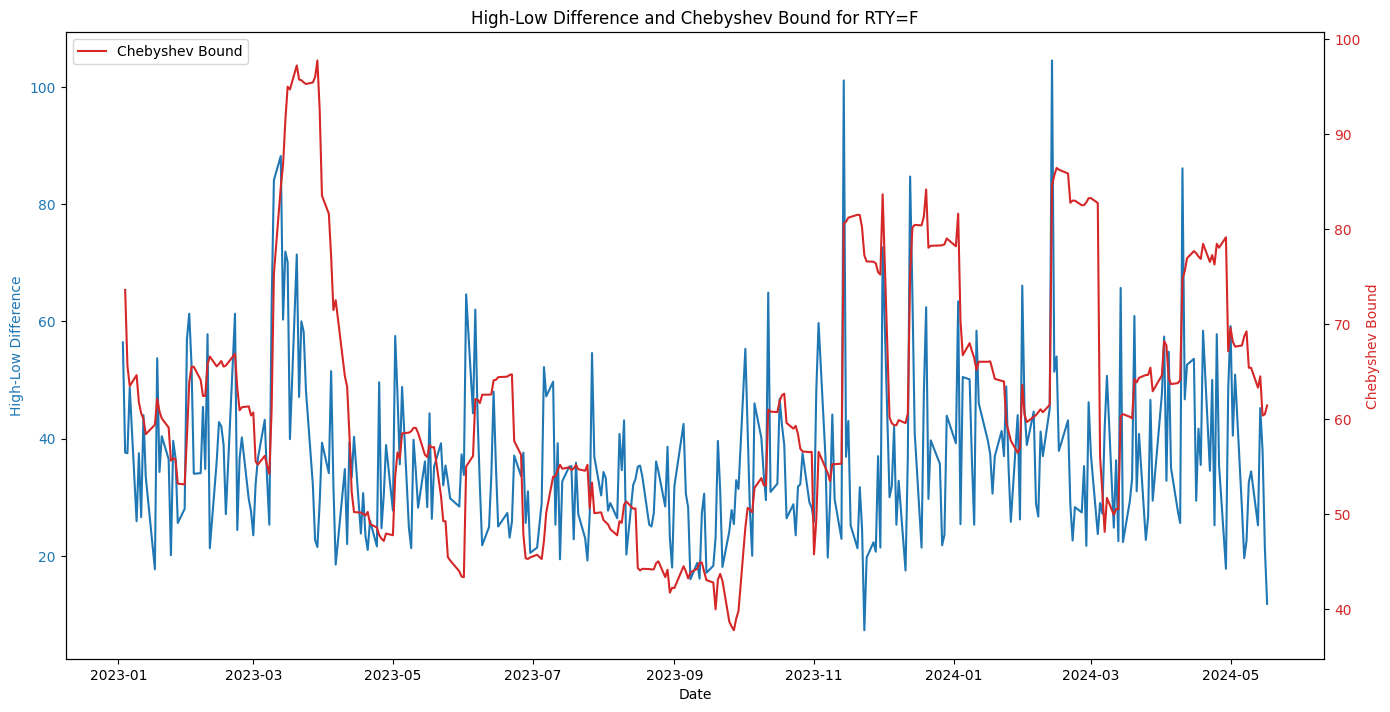

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Download historical data for a given ticker
ticker = 'RTY=F'
data = yf.download(ticker, start='2023-01-01', end='2024-05-18')

# Calculate High-Low Difference
data['High_Low_Diff'] = data['High'] - data['Low']

# Calculate the rolling mean and standard deviation
rolling_mean = data['High_Low_Diff'].rolling(window=14, min_periods=1).mean()
rolling_std = data['High_Low_Diff'].rolling(window=14, min_periods=1).std()

# Define the number of standard deviations for the threshold
k = 2

# Calculate the Chebyshev bound for each day
chebyshev_bound = rolling_mean + k * rolling_std

# Plot the High-Low Difference and the Chebyshev bound
fig, ax1 = plt.subplots(figsize=(14, 7))

ax1.set_xlabel('Date')
ax1.set_ylabel('High-Low Difference', color='tab:blue')
ax1.plot(data['High_Low_Diff'], color='tab:blue', label='High-Low Difference')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()  # Instantiate a second y-axis that shares the same x-axis
ax2.set_ylabel('Chebyshev Bound', color='tab:red')
ax2.plot(chebyshev_bound, color='tab:red', label='Chebyshev Bound')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()  # To prevent the labels from overlapping
plt.title(f'High-Low Difference and Chebyshev Bound for {ticker}')
plt.legend(loc='upper left')
plt.show()


[*********************100%%**********************]  1 of 1 completed


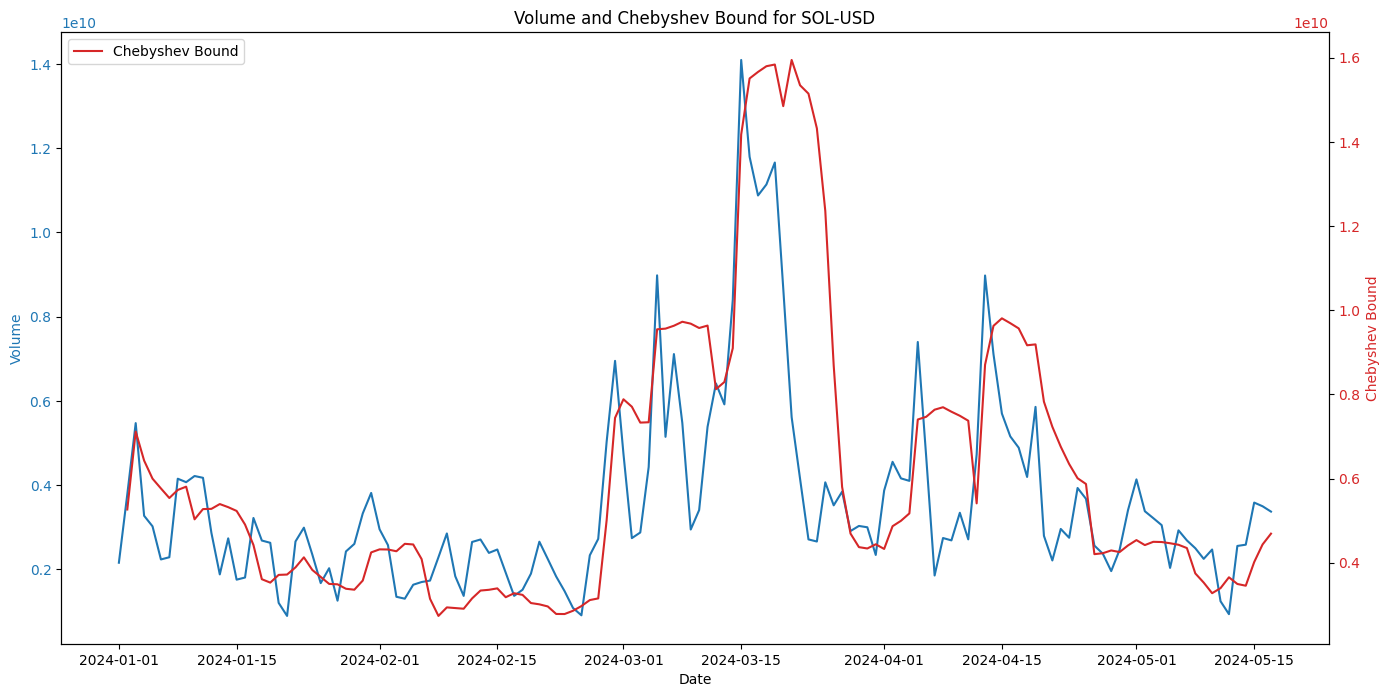

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Download historical data for a given ticker
ticker = 'SOL-USD'
data = yf.download(ticker, start='2024-01-01', end='2024-05-18')

# Calculate the rolling mean and standard deviation of volume
rolling_mean_volume = data['Volume'].rolling(window=7, min_periods=1).mean()
rolling_std_volume = data['Volume'].rolling(window=7, min_periods=1).std()

# Define the number of standard deviations for the threshold
k = 2

# Calculate the Chebyshev bound for each day
chebyshev_bound_volume = rolling_mean_volume + k * rolling_std_volume

# Plot the Volume and the Chebyshev bound
fig, ax1 = plt.subplots(figsize=(14, 7))

ax1.set_xlabel('Date')
ax1.set_ylabel('Volume', color='tab:blue')
ax1.plot(data['Volume'], color='tab:blue', label='Volume')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()  # Instantiate a second y-axis that shares the same x-axis
ax2.set_ylabel('Chebyshev Bound', color='tab:red')
ax2.plot(chebyshev_bound_volume, color='tab:red', label='Chebyshev Bound')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()  # To prevent the labels from overlapping
plt.title(f'Volume and Chebyshev Bound for {ticker}')
plt.legend(loc='upper left')
plt.show()


[*********************100%%**********************]  1 of 1 completed


Mean Squared Error: 0.002097838300267374


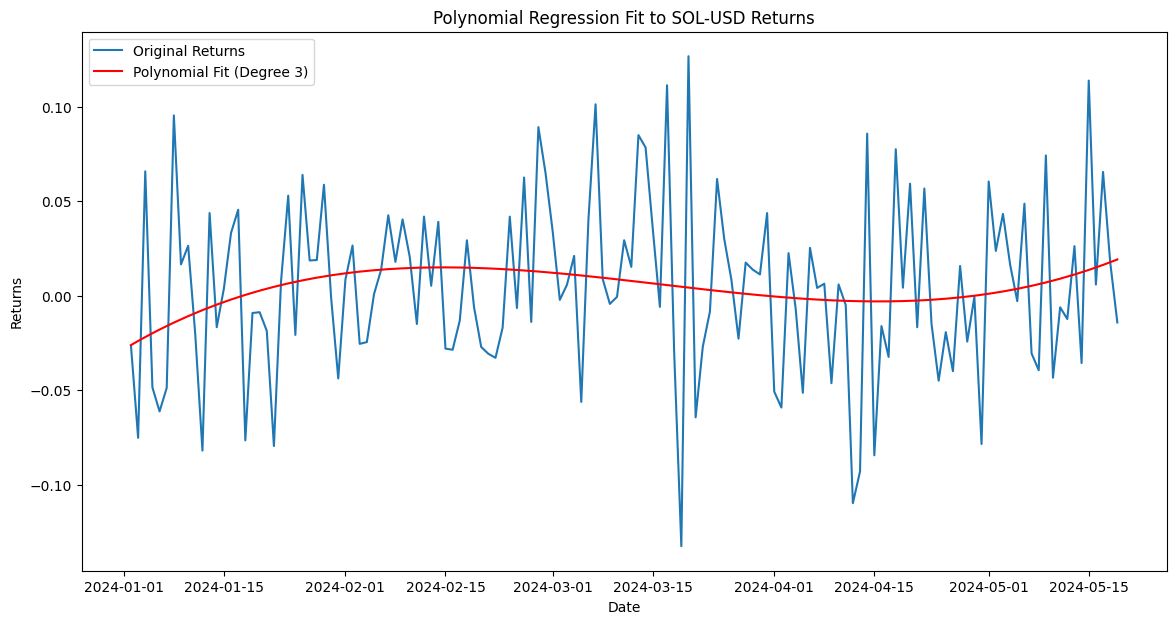

In [ ]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define the stock ticker and the period for which to fetch data
ticker_symbol = 'SOL-USD'  # Example: Apple Inc.
start_date = '2024-01-01'
end_date = '2024-05-20'

# Fetch historical market data
data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Calculate daily returns
data['Returns'] = data['Close'].pct_change()

# Remove the first row (NaN value due to no previous day)
data = data.dropna()

# Prepare the data for polynomial regression
X = np.arange(len(data)).reshape(-1, 1)
y = data['Returns'].values.reshape(-1, 1)

# Create polynomial features
degree = 3
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(X)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Predict using the model
y_pred = model.predict(X_poly)

# Calculate the Mean Squared Error
mse = mean_squared_error(y, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot the original returns and the polynomial regression fit
plt.figure(figsize=(14, 7))
plt.plot(data.index, y, label='Original Returns')
plt.plot(data.index, y_pred, color='red', label=f'Polynomial Fit (Degree {degree})')
plt.title(f'Polynomial Regression Fit to {ticker_symbol} Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()
